<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Capstone Project <br> (Group 6) </b>
                </font>
            </div>
        </td>
        <td width="20%">
            <img src="capstone-project.png">
        </td>
    </tr>
</table>

## Problem Statement

Air Quality Index (AQI) is a tool to disseminate information on air quality in qualitative terms (e.g., good, satisfactory, poor) as well as its associated likely health impacts. The intended uses of AQI are to identify the poor air quality zones and public reporting for severity of exposure of poor air quality. We use different regression, classification and time series techniques to predict the AQI in different cities of India.

## About the dataset (City Day AQI)

**City**: Name of the 26 different cities of India.<br>
**Date**: In dataset date is available from year 2015 to 2020.<br>
**PM2.5**: PM2.5 is a fine particulate matter particle in air that have diameter less than 2.5 micrometres (more than 100 times thinner than a human hair) and remain suspended for longer. These particles are formed as a result of burning fuel and chemical reactions that take place in the atmosphere.<br>
**PM10**: PM10 are very small particles found in dust and smoke. They have a diameter of 10 micrometres (0.01 mm) or smaller. PM2.5 comprises a portion of PM10.<br>
**NO** : Nitric oxides (NO) are produced in combustion processes, partly from nitrogen compounds in the fuel, but mostly by direct combination of atmospheric oxygen and nitrogen in flames. Nitrogen oxides are produced naturally by lightning, and also, to a small extent, by microbial processes in soils.<br>
**NO2**: Nitrogen dioxide (NO2) is formed due to the oxidation of nitrogen oxides in the presence of oxygen. The main source of nitrogen dioxide resulting from human activities is the combustion of fossil fuels (coal, gas and oil) especially fuel used in cars.<br>
**NOx**: Nitrogen oxide (NOx) pollution is emitted by automobiles, trucks and various non-road vehicles (e.g., construction equipment, boats, etc.) as well as industrial sources such as power plants, industrial boilers, cement kilns, and turbines. NOx often appears as a brownish gas.<br>
**NH3**: NH3 is poisonous if inhaled in great quantities and is irritating to the eyes, nose, and throat in lesser amounts. It combines in the atmosphere with sulphates and nitrates to form secondary fine particulate matter (PM2.5).<br>
**CO**: CO is a colorless, odorless gas that can be harmful when inhaled in large amounts. CO is released when something is burned. The greatest sources of CO to outdoor air are cars, trucks and other vehicles or machinery that burn fossil fuels.<br>
**SO2**: Sulfur dioxide (SO2) is a gaseous air pollutant composed of sulfur and oxygen. SO2 forms when sulfur-containing fuel such as coal, oil, or diesel is burned.<br>
**O3**: Ozone (O3) at ground level is a harmful air pollutant, because of its effects on people and the environment. Ground-level ozone comes from pollution emitted from cars, power plants, industrial boilers, refineries, and chemical plants. Ozone pollution can even come from paints, cleaners, solvents, and motorized lawn equipment.<br>
**Benzene**: Benzene is an air toxic emitted from gasoline service stations, motor vehicle exhaust and fuel evaporation, the burning of coal and oil, and various other sources. In addition to being a common air pollutant, benzene may also contaminate water.<br>
**Toluene**: Motor vehicle emissions are the main source of toluene in the urban air environment, although evaporative losses from fuel storage facilities and service stations, as well as the use of toluene-based solvents and thinners are other contributors. Like benzene, toluene is a component of tobacco smoke.<br>
**Xylene**: Motor vehicle emissions are the predominant source of xylene in the urban air environment. Evaporation from petroleum fuels storage facilities and service stations, and the use of products containing xylene-based solvents and thinners, are other ways xylene enters the air environment.<br>
**AQI**: The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for us. (Target Variable)<br>
**AQI_Bucket**: Air quality indicated in 6 categories as 'Good' (0-50), 'Satisfactory' (51-100), 'Moderate' (101-200), 'Poor' (201-300), 'Very Poor' (301-400), 'Severe' (401-500).<br>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Missing Value Analysis](#null)**
    - 2.4 - **[Outlier Analysis](#outlier)**
    - 2.5 - **[Outlier and Missing Value Treatment](#treatment)**
3. **[Exploratory Data Analysis (EDA)](#eda)**
    - 3.1 - **[Distplot](#distplot)**
    - 3.2 - **[Heatmap](#heatmap)**
    - 3.3 - **[Pre Covid](#pre)**
    - 3.4 - **[Post Covid](#post)**
4. **[Multiple Linear Regression](#linreg)**
    - 4.1 - **[Scale the Data](#scale)**
    - 4.2 - **[Train-Test Split](#split)**
    - 4.3 - **[Create generalized functions to calculate various metrics for models](#generalised)**
    - 4.4 - **[Full Model (OLS)](#full)**
    - 4.5 - **[Variance Inflation Factor (VIF) Model](#vif)**
    - 4.6 - **[Model with significant p-values](#pval)**
5. **[Stepwise Regression](#step)**
    - 5.1 - **[Forward Selection](#for)**
    - 5.2 - **[Backward Elimination](#back)**
6. **[Recursive Feature Elimination (RFE)](#rfe)**
7. **[Stochastic Gradient Descent (SGD)](#SGD)**
8. **[Regularization](#regu)**
    - 8.1 - **[Ridge Regression](#ridge)**
    - 8.2 - **[Lasso Regression](#lasso)**
    - 8.3 - **[Elastic Net Regression](#elastic)**
9. **[GridSearchCV](#GScv)**
10. **[Decision Tree Regressor](#DTR)**
11. **[Random Forest Regressor](#RFR)**
12. **[AdaBoost Regressor](#ada)**
13. **[Compare Model Performances](#compare)**
14. **[Best Model deployed with Pickle](#pickle)**

<a id="lib"></a>
# 1. Import Libraries

#### Import the required libraries

In [ ]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'missingno' to visualize missing numbers
import missingno as msno

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
import scipy.stats as stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import KFold

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import function for decision tree regression
import sklearn.tree as tree
from sklearn.tree import DecisionTreeRegressor

# import function for classification report & metrics
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

# import function for Random Forest regression
from sklearn.ensemble import RandomForestRegressor

# import function for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# import pickle to deploy the best model
import pickle

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

#### Read the dataset and print the first five observations.

In [ ]:
# read the data
city_df = pd.read_csv('city_day.csv')

In [ ]:
# check first five rows of data
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-07-2020,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,01-07-2020,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,01-07-2020,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,01-07-2020,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,01-07-2020,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good


In [ ]:
# summary of all the variable in the dataset
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
# summary of numeric variables
city_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


<a id="dtype"></a>
## 2.2 Check the Data Type

#### Variable types : 
Identifying the type of variable we are working with is always the first step of the data analysis process. We classify the variables as follows:

1.Numerical (quantitative).
2.Categorical (qualitative).

In [ ]:
city_df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [ ]:
# use pandas.to_datetime() function to convert string to datetime(YYY-MM-DD) format.
# USE rename() function to rename the columns in a pandas DataFrame.
# We can also set the argument inplace to True for the change to happen in the existing DataFrame.

city_df['Date'] = pd.to_datetime(city_df['Date'])
city_df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2020-01-07,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,2020-01-07,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,2020-01-07,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,2020-01-07,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,2020-01-07,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good


In [ ]:
# recheck the data types using 'dtypes'
city_df.dtypes

City                   object
Date           datetime64[ns]
PM2.5                 float64
PM10                  float64
NO                    float64
NO2                   float64
NOx                   float64
NH3                   float64
CO                    float64
SO2                   float64
O3                    float64
Benzene               float64
Toluene               float64
Xylene                float64
AQI                   float64
Air_quality            object
dtype: object

<a id="null"></a>
## 2.3 Missing Value Analysis

In [ ]:
# use isnull() to check for missing values
# sum(): gives the sum of missing values in each column

city_df.isnull().sum()

City               0
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
Air_quality     4681
dtype: int64

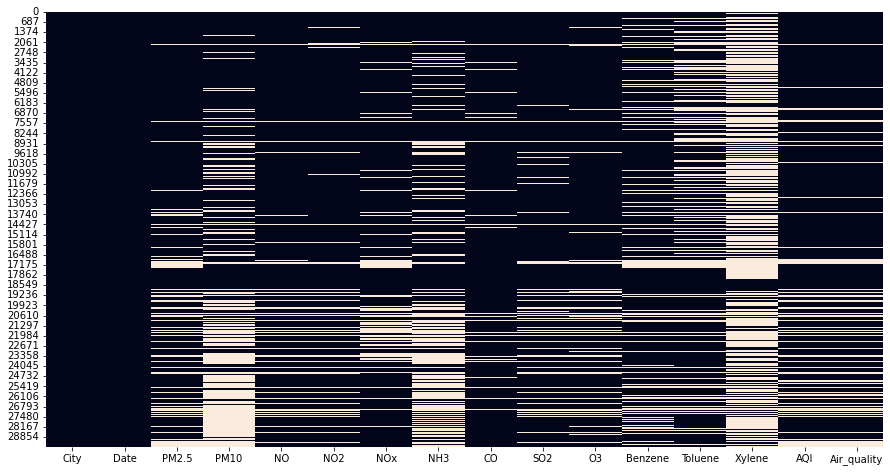

In [ ]:
sns.heatmap(city_df.isnull(),cbar=False);

<a id="outlier"></a>
## 2.4 Outlier Analysis

#### Make a dataframe of numerical columns 

In [ ]:
# Making a copy of the dataframe to have only numerical values.
all_numeric_city_df = city_df.copy()
all_numeric_city_df.drop(['City','Date','Air_quality'], inplace=True, axis=1)

In [ ]:
# summary of all the variable in the dataset
all_numeric_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    24933 non-null  float64
 1   PM10     18391 non-null  float64
 2   NO       25949 non-null  float64
 3   NO2      25946 non-null  float64
 4   NOx      25346 non-null  float64
 5   NH3      19203 non-null  float64
 6   CO       27472 non-null  float64
 7   SO2      25677 non-null  float64
 8   O3       25509 non-null  float64
 9   Benzene  23908 non-null  float64
 10  Toluene  21490 non-null  float64
 11  Xylene   11422 non-null  float64
 12  AQI      24850 non-null  float64
dtypes: float64(13)
memory usage: 2.9 MB


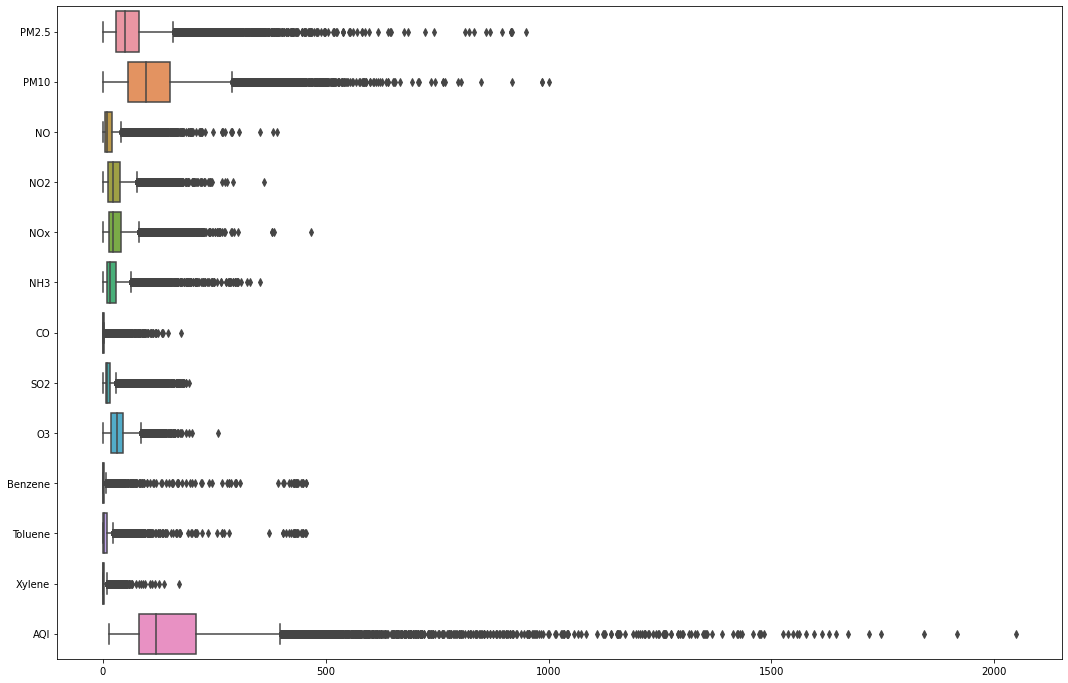

In [ ]:
# Plot the Boxplot using boxplot() from seaborn for each variable.
# A boxplot is also used to identify outliers. The points beyond, the whiskers are the outliers.
# Figsize()- set the figure size.
# Orient: "h" specifies horizontal boxplot (for vertical boxplots use "v").

plt.figure(figsize=(18,12))
sns.boxplot(data=all_numeric_city_df, orient="h");

In [ ]:
# ploting Interquartile Range (IQR) using def we define a funtion.

def iqr(df):
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1

    lower_bound = round(q1 - (10 * iqr), 2)
    upper_bound = round(q3 + (10 * iqr), 2)
    res = lower_bound, upper_bound
    
    return res

In [ ]:
# use a for loop to print the values of IQR 
for i in all_numeric_city_df.columns:
    print(f'IQR * 10 --> Extended IQR of {i} is {iqr(all_numeric_city_df[i])}')

IQR * 10 --> Extended IQR of PM2.5 is (-488.88, 598.29)
IQR * 10 --> Extended IQR of PM10 is (-878.65, 1084.64)
IQR * 10 --> Extended IQR of NO is (-137.57, 163.15)
IQR * 10 --> Extended IQR of NO2 is (-246.95, 296.32)
IQR * 10 --> Extended IQR of NOx is (-260.26, 313.2)
IQR * 10 --> Extended IQR of NH3 is (-205.82, 244.42)
IQR * 10 --> Extended IQR of CO is (-8.89, 10.85)
IQR * 10 --> Extended IQR of SO2 is (-89.83, 110.72)
IQR * 10 --> Extended IQR of O3 is (-248.24, 312.67)
IQR * 10 --> Extended IQR of Benzene is (-29.48, 32.68)
IQR * 10 --> Extended IQR of Toluene is (-84.9, 94.65)
IQR * 10 --> Extended IQR of Xylene is (-31.96, 35.45)
IQR * 10 --> Extended IQR of AQI is (-1189.0, 1478.0)


<a id="treatment"></a>
## 2.5 Outlier and Missing Value Treatment

In [ ]:
tmp = all_numeric_city_df[(all_numeric_city_df.iloc[:,:-1].isna().all(axis=1)) | 
                          (all_numeric_city_df['AQI'].isna()) |
                          (all_numeric_city_df['AQI'] > 1478)]

In [ ]:
#use index to find the position of an element
lst = tmp.index

In [ ]:
lst

Int64Index([    6,     9,    32,    58,    84,   110,   136,   162,   188,
              214,
            ...
            29519, 29520, 29521, 29523, 29524, 29525, 29526, 29527, 29529,
            29530],
           dtype='int64', length=4747)

In [ ]:
# use drop() to removes the specified row or column.
all_numeric_city_df.drop(index=lst, inplace=True)

In [ ]:
# with head(10) we can check first 10 rows of data.
all_numeric_city_df.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0
1,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0
2,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
3,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0
4,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0
5,14.00,30.00,1.10,5.12,3.62,8.05,0.35,12.45,48.77,NaN,NaN,NaN,69.0
7,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0
8,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,NaN,92.0
10,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0
11,5.88,13.91,2.58,2.40,1.60,1.44,2.10,2.72,NaN,0.00,0.00,0.00,111.0


In [ ]:
all_numeric_city_df.reset_index(inplace=True)
all_numeric_city_df.drop('index', axis=1, inplace=True)
all_numeric_city_df.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0
1,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0
2,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
3,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0
4,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0
5,14.00,30.00,1.10,5.12,3.62,8.05,0.35,12.45,48.77,NaN,NaN,NaN,69.0
6,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0
7,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,NaN,92.0
8,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0
9,5.88,13.91,2.58,2.40,1.60,1.44,2.10,2.72,NaN,0.00,0.00,0.00,111.0


In [ ]:
city_df.drop(index=lst, inplace=True)
city_df.reset_index(inplace=True)
city_df.drop('index', axis=1, inplace=True)
city_df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2020-01-07,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,2020-01-07,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,2020-01-07,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,2020-01-07,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,2020-01-07,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good
5,Bhopal,2020-01-07,14.00,30.00,1.10,5.12,3.62,8.05,0.35,12.45,48.77,NaN,NaN,NaN,69.0,Satisfactory
6,Chandigarh,2020-01-07,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0,Satisfactory
7,Chennai,2020-01-07,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,NaN,92.0,Satisfactory
8,Delhi,2020-01-07,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0,Moderate
9,Ernakulam,2020-01-07,5.88,13.91,2.58,2.40,1.60,1.44,2.10,2.72,NaN,0.00,0.00,0.00,111.0,Moderate


#### Treating null values with the median values for a given city

In [ ]:
# checking for missing values.
city_df.isnull().sum().sort_values(ascending=False)

Xylene         15323
PM10            7021
NH3             6470
Toluene         5777
Benzene         3486
NOx             1808
O3               755
PM2.5            629
SO2              554
CO               396
NO2              342
NO               338
City               0
Date               0
AQI                0
Air_quality        0
dtype: int64

In [ ]:
grouped_city_median = city_df.iloc[:,:-2].groupby('City').median()

In [ ]:
grouped_city_median

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
City,,,,,,,,,,,,
Ahmedabad,57.690,107.630,16.150,48.375,39.590,NaN,16.060,46.940,39.660,4.070,30.240,2.04
Aizawl,10.450,18.960,11.530,0.260,15.460,22.710,0.260,7.360,2.665,3.475,3.985,NaN
Amaravati,28.215,64.095,3.140,15.315,10.845,11.360,0.580,12.990,32.650,0.130,1.000,0.13
Amritsar,43.960,97.830,15.010,13.760,27.650,11.660,0.590,6.470,20.740,3.225,2.060,6.57
Bengaluru,30.970,77.485,7.540,27.400,19.430,20.000,0.915,4.990,30.460,0.795,1.750,NaN
Bhopal,45.015,120.920,5.230,32.500,22.845,17.250,0.870,12.120,60.130,NaN,NaN,NaN
Brajrajnagar,60.795,119.580,12.990,16.640,22.110,35.005,1.910,11.510,10.270,0.045,NaN,NaN
Chandigarh,33.660,78.670,6.870,11.330,10.870,31.340,0.600,9.970,16.260,4.370,0.490,1.02
Chennai,45.505,50.245,7.780,15.380,16.820,46.920,0.850,6.465,30.410,0.180,0.790,NaN


In [ ]:
grouped_city_median.isnull().sum().sort_values(ascending=False)

Xylene     15
Toluene     6
Benzene     4
PM10        1
NOx         1
NH3         1
O3          1
PM2.5       0
NO          0
NO2         0
CO          0
SO2         0
dtype: int64

In [ ]:
city_df[city_df['City'] == 'Ernakulam']['O3'].isnull().sum()

152

In [ ]:
city_df[city_df['City'] == 'Ahmedabad']['NH3'].isnull().sum()

1315

In [ ]:
grouped_city_median.fillna(0, inplace=True)

In [ ]:
grouped_city_median.isnull().sum().sort_values(ascending=False)

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
dtype: int64

In [ ]:
grouped_city_median

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
City,,,,,,,,,,,,
Ahmedabad,57.690,107.630,16.150,48.375,39.590,0.000,16.060,46.940,39.660,4.070,30.240,2.04
Aizawl,10.450,18.960,11.530,0.260,15.460,22.710,0.260,7.360,2.665,3.475,3.985,0.00
Amaravati,28.215,64.095,3.140,15.315,10.845,11.360,0.580,12.990,32.650,0.130,1.000,0.13
Amritsar,43.960,97.830,15.010,13.760,27.650,11.660,0.590,6.470,20.740,3.225,2.060,6.57
Bengaluru,30.970,77.485,7.540,27.400,19.430,20.000,0.915,4.990,30.460,0.795,1.750,0.00
Bhopal,45.015,120.920,5.230,32.500,22.845,17.250,0.870,12.120,60.130,0.000,0.000,0.00
Brajrajnagar,60.795,119.580,12.990,16.640,22.110,35.005,1.910,11.510,10.270,0.045,0.000,0.00
Chandigarh,33.660,78.670,6.870,11.330,10.870,31.340,0.600,9.970,16.260,4.370,0.490,1.02
Chennai,45.505,50.245,7.780,15.380,16.820,46.920,0.850,6.465,30.410,0.180,0.790,0.00


In [ ]:
city_df.isnull().sum().sort_values(ascending=False)

Xylene         15323
PM10            7021
NH3             6470
Toluene         5777
Benzene         3486
NOx             1808
O3               755
PM2.5            629
SO2              554
CO               396
NO2              342
NO               338
City               0
Date               0
AQI                0
Air_quality        0
dtype: int64

In [ ]:
all_numeric_city_df.isnull().sum().sort_values(ascending=False)

Xylene     15323
PM10        7021
NH3         6470
Toluene     5777
Benzene     3486
NOx         1808
O3           755
PM2.5        629
SO2          554
CO           396
NO2          342
NO           338
AQI            0
dtype: int64

In [ ]:
for i in all_numeric_city_df.columns:
    city_df[i] = city_df[i].fillna(city_df.groupby('City')[i].transform('median'))
    all_numeric_city_df[i] = all_numeric_city_df[i].fillna(city_df.groupby('City')[i].transform('median'))
    city_df[i] = city_df[i].fillna(0)
    all_numeric_city_df[i] = all_numeric_city_df[i].fillna(0)

In [ ]:
city_df.isnull().sum().sort_values(ascending=False)

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
Air_quality    0
dtype: int64

In [ ]:
all_numeric_city_df.isnull().sum().sort_values(ascending=False)

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [ ]:
city_df[city_df.isna().any(axis = 1)]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality


In [ ]:
all_numeric_city_df[all_numeric_city_df.isna().any(axis = 1)]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI


<a id="eda"></a>
# 3. Exploratory Data Analysis (EDA)

<a id="distplot"></a>
## 3.1 Distplot

#### Plot distplot to see the distribution of numerical columns

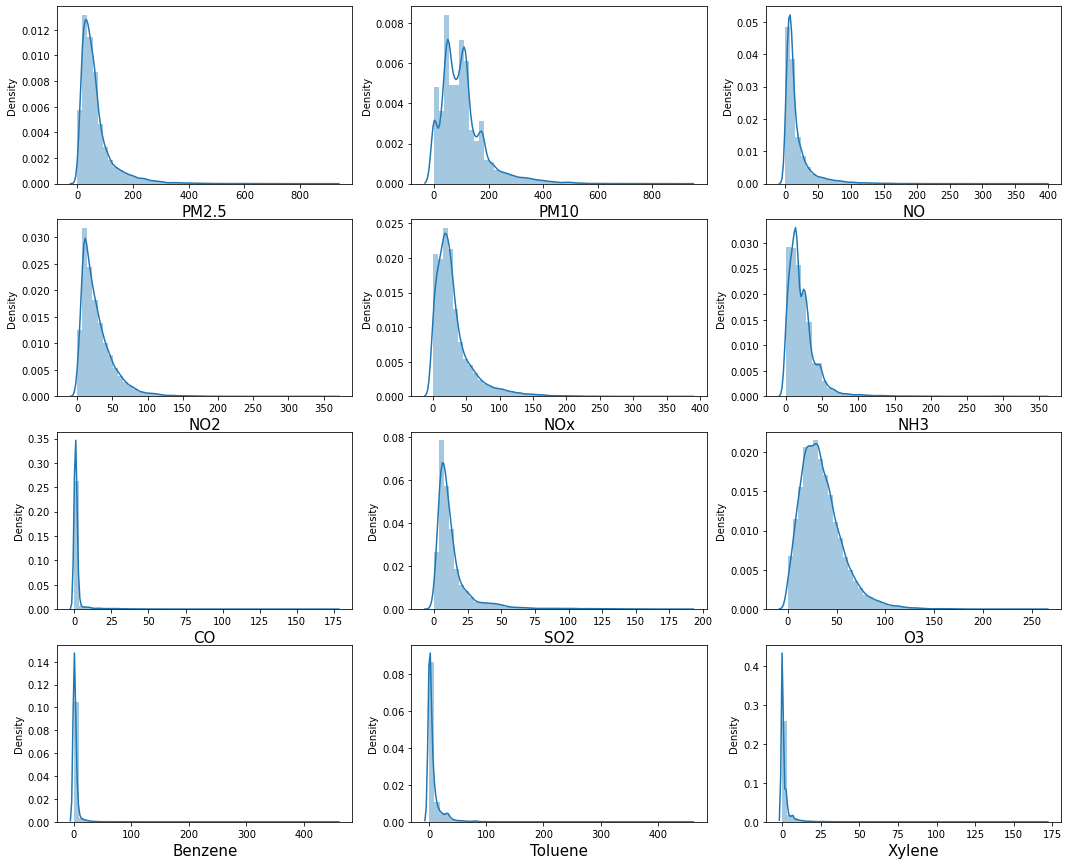

In [ ]:
# plot the distplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(4, 3, figsize=(18, 15))

# z: let the variable z define the distplot
# x: data for which the distplot is to be plotted
# ax: specifies the axes object to draw the plot o

for variable, subplot in zip(all_numeric_city_df.columns, ax.flatten()):
    z = sns.distplot(x = all_numeric_city_df[variable], ax=subplot) # plot the distplot
    z.set_xlabel(variable, fontsize = 15)

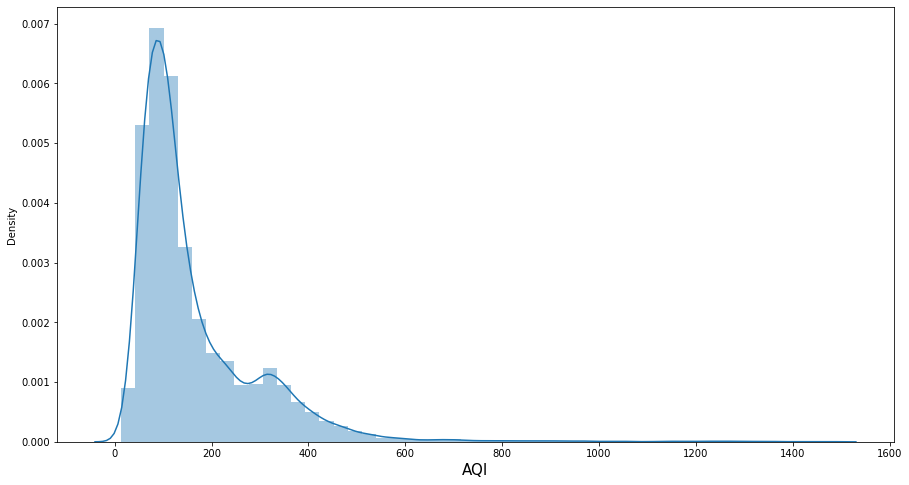

In [ ]:
# distplot of target variable
fig = sns.distplot(x = all_numeric_city_df['AQI'])
fig.set_xlabel('AQI', fontsize = 15);

In [ ]:
all_numeric_city_df.skew()

PM2.5       3.010536
PM10        1.878873
NO          3.556727
NO2         2.431947
NOx         2.440476
NH3         4.295976
CO          8.198653
SO2         3.950439
O3          1.316008
Benzene    23.197806
Toluene    12.504629
Xylene     10.744236
AQI         2.903815
dtype: float64

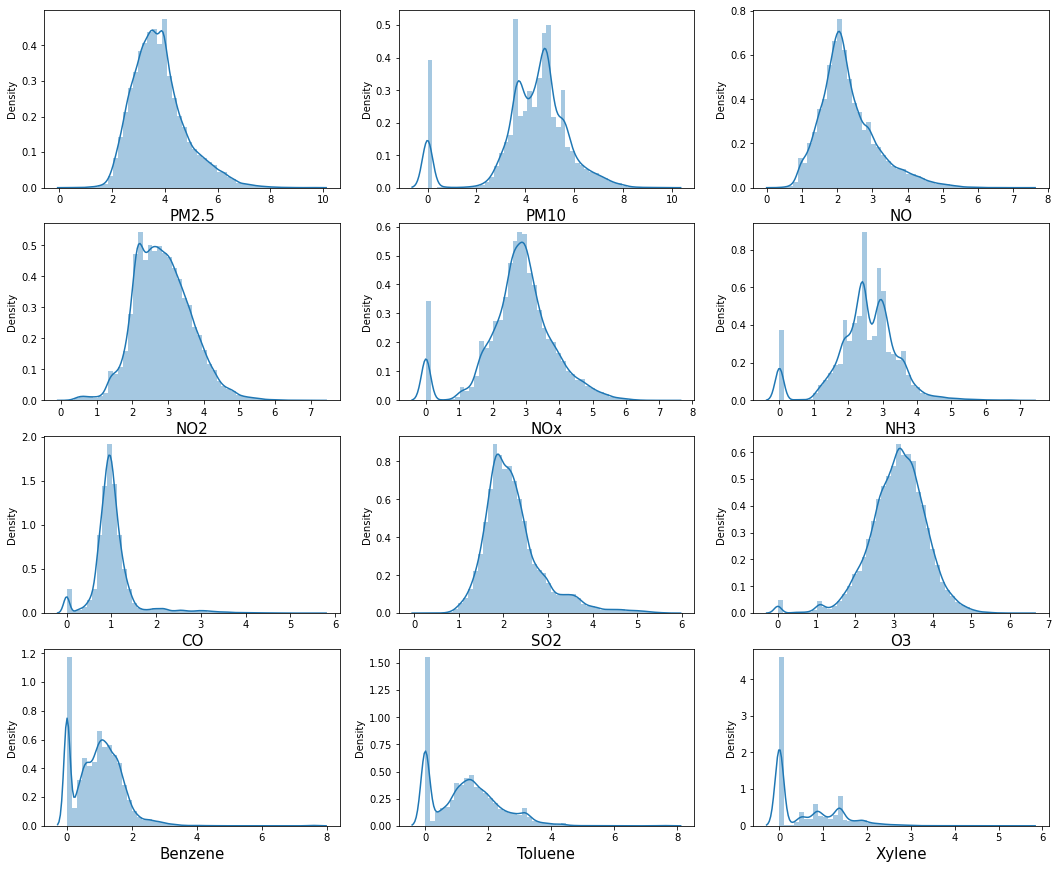

In [ ]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(4, 3, figsize=(18, 15))

# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# ax: specifies the axes object to draw the plot o

for variable, subplot in zip(all_numeric_city_df.columns, ax.flatten()):
    z = sns.distplot(x = np.cbrt(all_numeric_city_df[variable]), ax=subplot) # plot the distplot
    z.set_xlabel(variable, fontsize = 15)

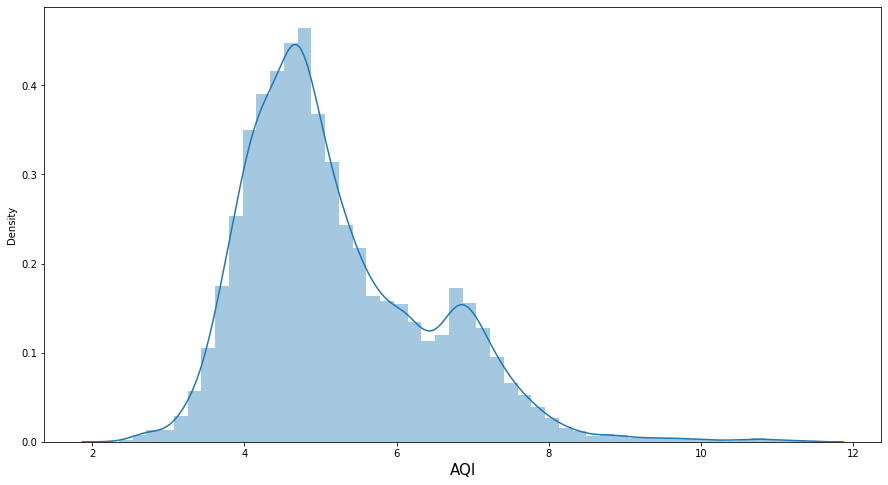

In [ ]:
fig = sns.distplot(x = np.cbrt(all_numeric_city_df['AQI']))
fig.set_xlabel('AQI', fontsize = 15);

In [ ]:
np.cbrt(all_numeric_city_df).skew()

PM2.5      0.855178
PM10      -1.104619
NO         1.030038
NO2        0.354351
NOx       -0.425508
NH3       -0.414195
CO         2.450723
SO2        1.406395
O3        -0.582084
Benzene    1.272873
Toluene    0.655581
Xylene     1.026136
AQI        0.962231
dtype: float64

<a id="heatmap"></a>
## 3.2 Heatmap

#### Heatmap between dependent variable and independent variable having the most (Positive and Negative) correlation columns.

In [ ]:
corr_AQI = pd.DataFrame(index=['AQI'], columns=[all_numeric_city_df.columns])

In [ ]:
for variable in all_numeric_city_df.columns:
    corr_AQI.loc[:, variable] = round(np.corrcoef(all_numeric_city_df[variable], all_numeric_city_df['AQI'])[0,1], 4)

In [ ]:
corr_AQI

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
AQI,0.6748,0.4455,0.4436,0.5313,0.4599,0.0279,0.6463,0.4782,0.2071,0.0488,0.2882,0.1963,1.0


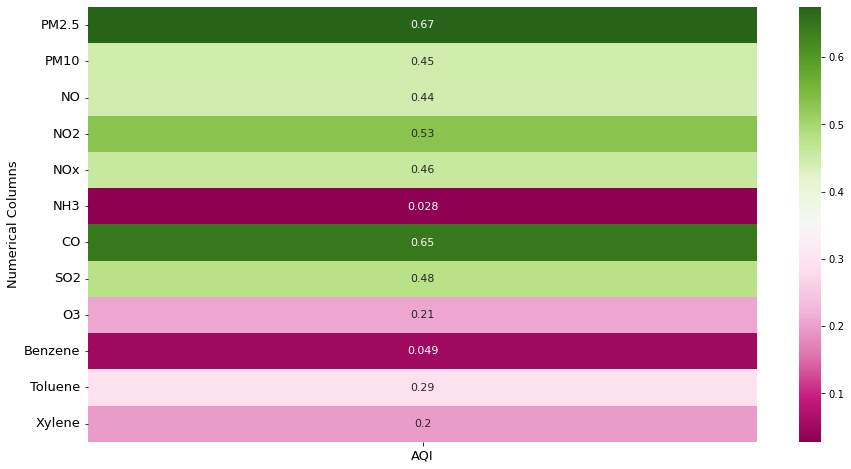

In [ ]:
# plot the heat map
# annot: prints the correlation values in the chart
sns.heatmap(corr_AQI.iloc[:,:-1].T, annot = True,  annot_kws = {"size": 11}, cmap='PiYG')

# set text size using 'fontsize'
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.ylabel('Numerical Columns', fontsize = 13)

# display the plot
plt.show()

#### Heatmap for the correlation among independent variables.

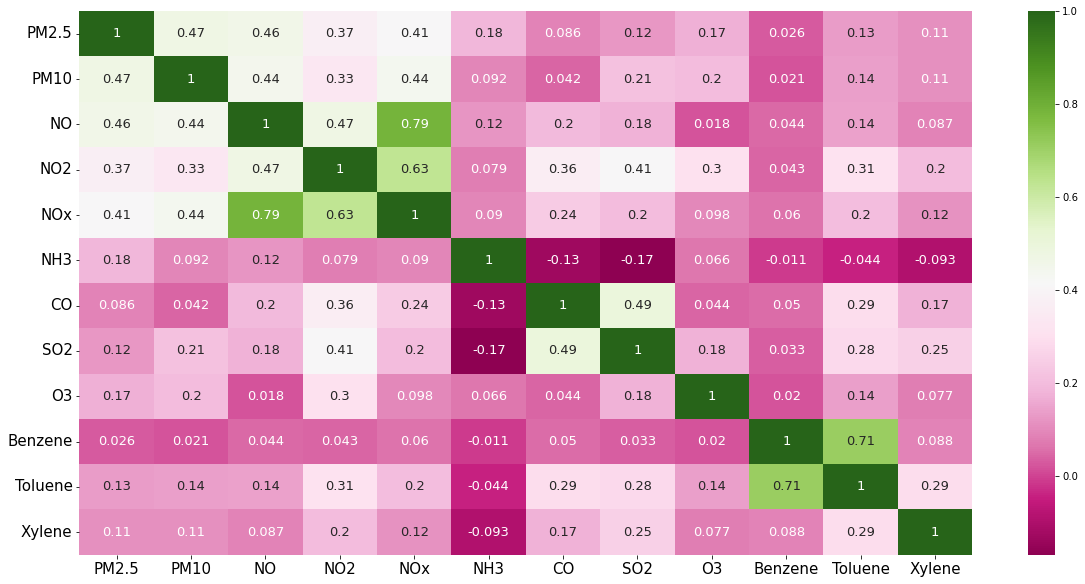

In [ ]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(all_numeric_city_df.drop('AQI', axis=1).corr(), annot = True, annot_kws = {"size": 13}, cmap='PiYG')

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

### Statstical Analysis

##### H0: Has No Effect on Target!
##### H0: Has a Clear Effect on Target!

In [ ]:
for i in all_numeric_city_df.columns[:-1]:
    g0 = all_numeric_city_df[i]
    g1 = all_numeric_city_df.AQI
    
    ts,pv = stats.pearsonr(g0, g1)
    if pv < 0.5:
        print('{} has a clear Effect on Target!\n'.format(i))
    else:
        print('{} has no Effect on Target!\n'.format(i))

PM2.5 has a clear Effect on Target!

PM10 has a clear Effect on Target!

NO has a clear Effect on Target!

NO2 has a clear Effect on Target!

NOx has a clear Effect on Target!

NH3 has a clear Effect on Target!

CO has a clear Effect on Target!

SO2 has a clear Effect on Target!

O3 has a clear Effect on Target!

Benzene has a clear Effect on Target!

Toluene has a clear Effect on Target!

Xylene has a clear Effect on Target!



<a id="pre"></a>
## 3.3 Pre Covid-19

Here we divide the data set into two part namely 

**Vehicular Pollution** content (PM2.5, PM10, NO2, NH3, CO,)

and **Industrial Pollution content** (CO, SO2, O3, Benzene, Toluene, Xylene)

and find how these contents correlated with AQI (air quality index)

In [ ]:
df_pre_corona = city_df.copy()

df_pre_corona = df_pre_corona[df_pre_corona['Date'] <= ('01-01-2020')]

df_pre_corona['Vehicular Pollution content'] = (df_pre_corona['PM2.5']+df_pre_corona['PM10']+df_pre_corona['NO']
                                                +df_pre_corona['NO2']+df_pre_corona['NOx']+df_pre_corona['NH3']
                                                +df_pre_corona['CO'])

df_pre_corona['Industrial Pollution content'] = (df_pre_corona['SO2']+df_pre_corona['O3']+
                                                 df_pre_corona['Benzene']+df_pre_corona['Toluene']+
                                                 df_pre_corona['Xylene'])

df_pre_corona = df_pre_corona.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)

df_pre_corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20392 entries, 4392 to 24783
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          20392 non-null  object        
 1   Date                          20392 non-null  datetime64[ns]
 2   AQI                           20392 non-null  float64       
 3   Air_quality                   20392 non-null  object        
 4   Vehicular Pollution content   20392 non-null  float64       
 5   Industrial Pollution content  20392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.1+ MB


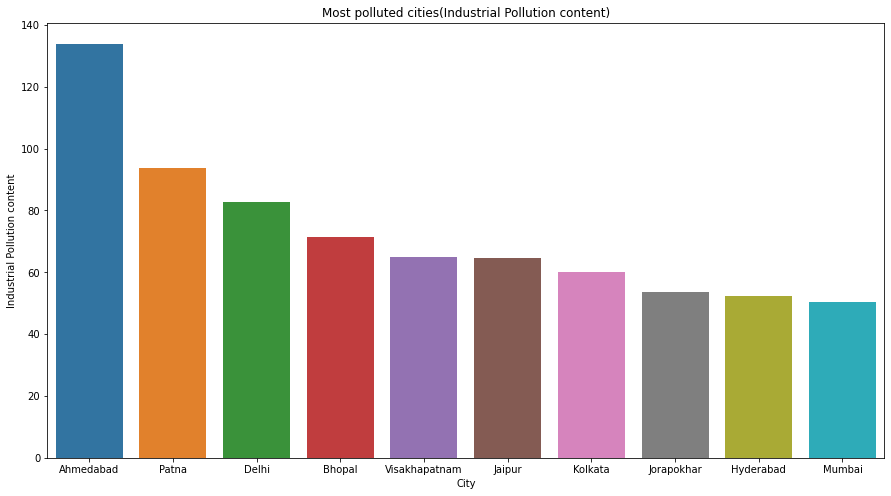

In [ ]:
sns.barplot(x=df_pre_corona.groupby('City').median()['Industrial Pollution content'].sort_values(ascending = False).head(10).index, 
            y=df_pre_corona.groupby('City').median()['Industrial Pollution content'].sort_values(ascending = False).head(10))

plt.title('Most polluted cities(Industrial Pollution content)');

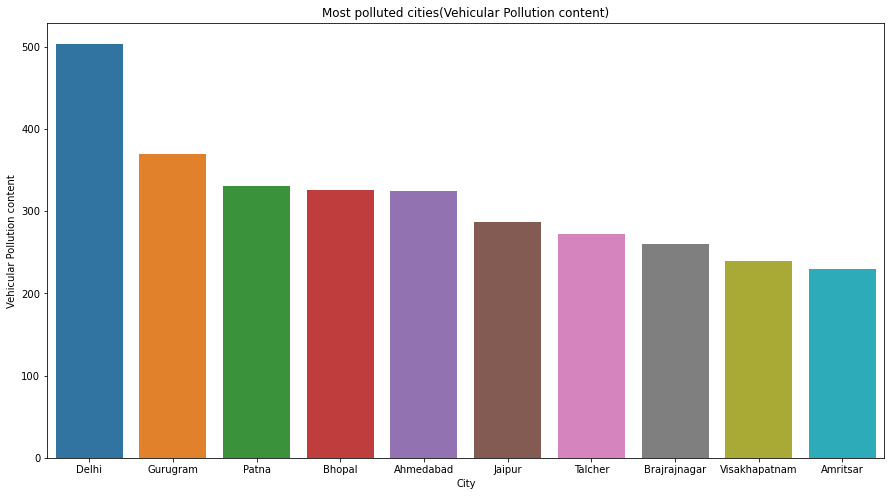

In [ ]:
sns.barplot(x=df_pre_corona.groupby('City').median()['Vehicular Pollution content'].sort_values(ascending = False).head(10).index, 
            y=df_pre_corona.groupby('City').median()['Vehicular Pollution content'].sort_values(ascending = False).head(10))

plt.title('Most polluted cities(Vehicular Pollution content)');

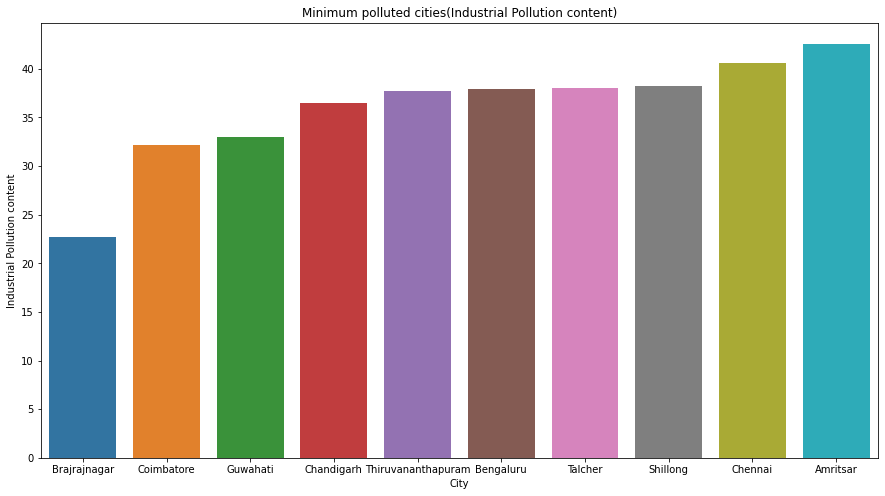

In [ ]:
sns.barplot(x=df_pre_corona.groupby('City').median()['Industrial Pollution content'].sort_values(ascending = True).head(10).index, 
            y=df_pre_corona.groupby('City').median()['Industrial Pollution content'].sort_values(ascending = True).head(10))

plt.title('Minimum polluted cities(Industrial Pollution content)');

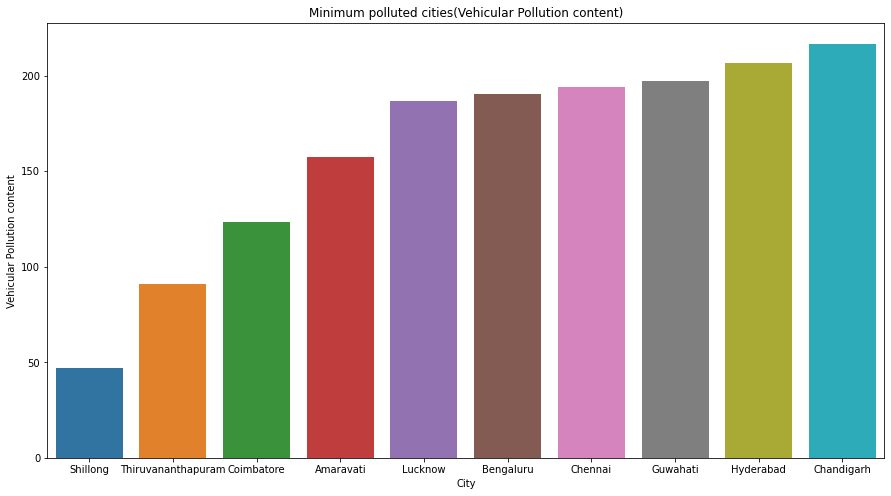

In [ ]:
sns.barplot(x=df_pre_corona.groupby('City').median()['Vehicular Pollution content'].sort_values(ascending = True).head(10).index, 
            y=df_pre_corona.groupby('City').median()['Vehicular Pollution content'].sort_values(ascending = True).head(10))

plt.title('Minimum polluted cities(Vehicular Pollution content)');

<a id="post"></a>
## 3.4 Post Covid - 19

In [ ]:
df_post_corona = city_df.copy()

df_post_corona = df_post_corona[df_post_corona['Date'] > ('01-01-2020')]

df_post_corona['Vehicular Pollution content'] = (df_post_corona['PM2.5']+df_post_corona['PM10']+df_post_corona['NO']
                                                +df_post_corona['NO2']+df_post_corona['NOx']+df_post_corona['NH3']
                                                +df_post_corona['CO'])

df_post_corona['Industrial Pollution content'] = (df_post_corona['SO2']+df_post_corona['O3']+
                                                 df_post_corona['Benzene']+df_post_corona['Toluene']+
                                                 df_post_corona['Xylene'])

df_post_corona = df_post_corona.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)

df_post_corona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4392 entries, 0 to 4391
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          4392 non-null   object        
 1   Date                          4392 non-null   datetime64[ns]
 2   AQI                           4392 non-null   float64       
 3   Air_quality                   4392 non-null   object        
 4   Vehicular Pollution content   4392 non-null   float64       
 5   Industrial Pollution content  4392 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 240.2+ KB


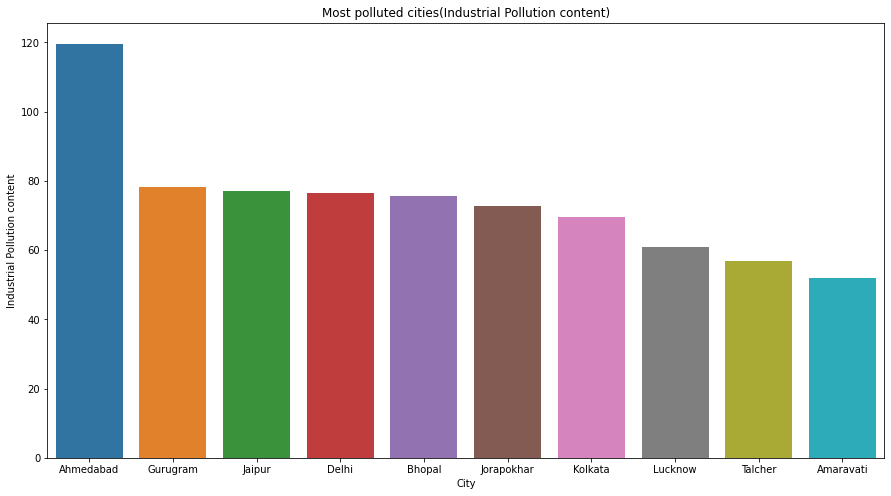

In [ ]:
sns.barplot(x=df_post_corona.groupby('City').median()['Industrial Pollution content'].sort_values(ascending = False).head(10).index, 
            y=df_post_corona.groupby('City').median()['Industrial Pollution content'].sort_values(ascending = False).head(10))

plt.title('Most polluted cities(Industrial Pollution content)');

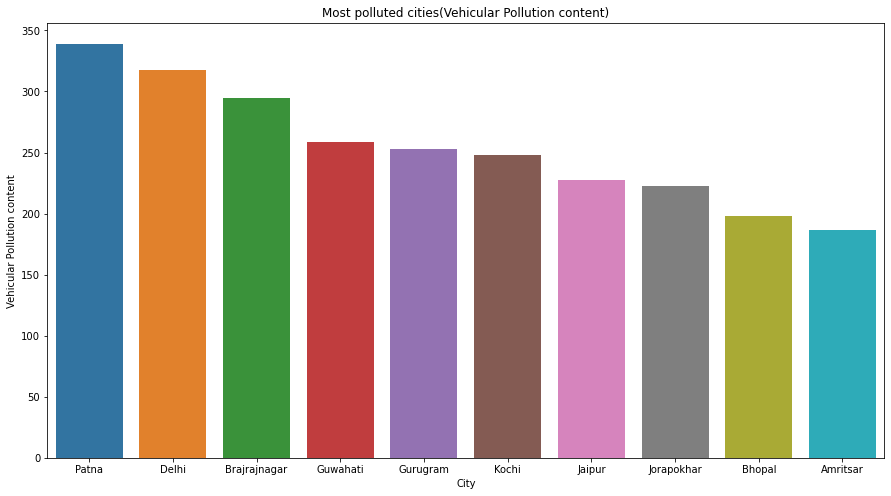

In [ ]:
sns.barplot(x=df_post_corona.groupby('City').median()['Vehicular Pollution content'].sort_values(ascending = False).head(10).index, 
            y=df_post_corona.groupby('City').median()['Vehicular Pollution content'].sort_values(ascending = False).head(10))

plt.title('Most polluted cities(Vehicular Pollution content)');

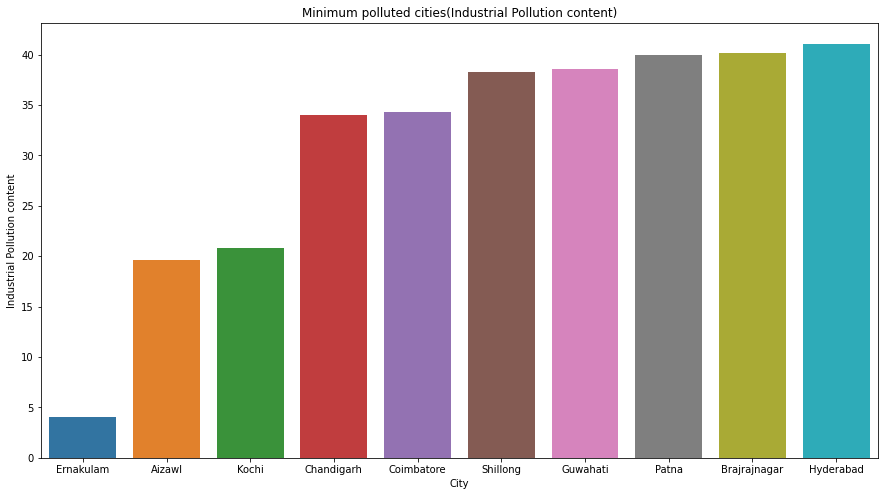

In [ ]:
sns.barplot(x=df_post_corona.groupby('City').median()['Industrial Pollution content'].sort_values(ascending = True).head(10).index, 
            y=df_post_corona.groupby('City').median()['Industrial Pollution content'].sort_values(ascending = True).head(10))

plt.title('Minimum polluted cities(Industrial Pollution content)');

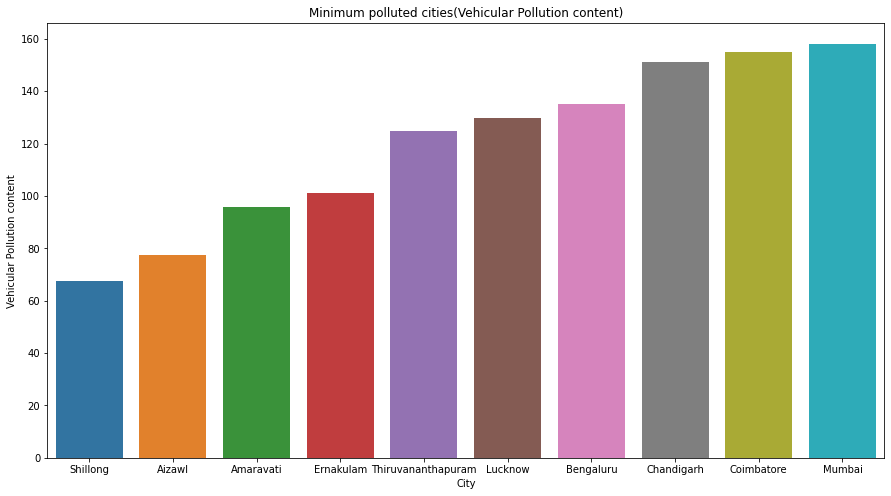

In [ ]:
sns.barplot(x=df_post_corona.groupby('City').median()['Vehicular Pollution content'].sort_values(ascending = True).head(10).index, 
            y=df_post_corona.groupby('City').median()['Vehicular Pollution content'].sort_values(ascending = True).head(10))

plt.title('Minimum polluted cities(Vehicular Pollution content)');

<a id="linreg"></a>
# 4. Multiple Linear Regression (OLS)

#### First split the dependent and independent variables.

Let us create the dataframes for independent and target variable for linear regression.

In [ ]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = all_numeric_city_df.drop('AQI', axis = 1)

# create dataframe of target variable
df_target = all_numeric_city_df['AQI']

<a id="scale"></a>
## 4.1 Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [ ]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_feature'
num_scaled = X_scaler.fit_transform(df_feature)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_feature = pd.DataFrame(num_scaled, columns = df_feature.columns)

# standardize the target variable explicitly
df_target = (df_target - df_target.mean()) / df_target.std()

<a id="split"></a>
## 4.2 Train-Test Split

#### Split the data into training and test sets.

Before applying variour regression techniques to predict the auction price of the player, let us split the dataset in train and test set.

In [ ]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full'
X_full = df_feature.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, random_state=42, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)

# print dimension of test set
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (17348, 13)
y_train : (17348,)
X_test  : (7436, 13)
y_test  : (7436,)


In [ ]:
X_train_full = X_train.copy()
X_train_full.drop("const", axis=1, inplace=True)
X_test_full = X_test.copy()
X_test_full.drop("const", axis=1, inplace=True)

y_train_full = y_train.copy()
y_test_full = y_test.copy()

<a id="generalised"></a>
## 4.3 Create generalized functions to calculate various metrics for models

#### Create a generalized function to calculate the RMSE for train and test set.

In [ ]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model, X_train, y_train):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [ ]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model, X_test, y_test):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

#### Create a generalized function to calculate the Adjusted R- Squared

In [ ]:
# define a function to get Adjusted R-squared value
def get_train_score(model, X_train, y_train):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the Adjusted R-squared value 
    return r_sq_adj

In [ ]:
# define a function to get Adjusted R-squared value
def get_test_score(model, X_test, y_test):
    
    # score() returns the R-squared value
    r_sq = model.score(X_test, y_test)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_test.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_test.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the Adjusted R-squared value 
    return r_sq_adj

#### Create a generalized function to create a dataframe containing the scores from all the models

In [ ]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=["Algorithm_name",'Train_score','Adj_Train_score', "Test_score","Adj_Test_score",
                                        'Train_RMSE', 'Test_RMSE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name,model_name, X_train , y_tain, X_test, y_test):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Algorithm_name': str(algorithm_name),
                       'Train_RMSE': get_train_rmse(model_name, X_train, y_train), 
                       'Test_RMSE': get_test_rmse(model_name, X_test, y_test), 
                       'Train_score': model_name.score(X_train,y_tain),
                        'Adj_Train_score': get_train_score(model_name, X_train, y_train),
                        'Adj_Test_score': get_test_score(model_name, X_test, y_test),
                       'Test_score': model_name.score(X_test, y_test)}, ignore_index = True)

#### Create a generalized function to plot a barchart for the coefficients

In [ ]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name, X):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
    
    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Variable')

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

<a id="full"></a>
## 4.4 Full Model (OLS)

It is used to study the linear relationship between a dependent (target) variable and two or more independent variables. We can use this technique to study the effect of multiple variables on the target variable.

In [ ]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     7210.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:37:47   Log-Likelihood:                -9096.5
No. Observations:               17348   AIC:                         1.822e+04
Df Residuals:                   17335   BIC:                         1.832e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.003     -0.400      0.6

In [ ]:
# using sklearn
LR = LinearRegression()

MLR_full_model_sk = LR.fit(X_train_full, y_train_full)
MLR_full_model_sk.score( X_train_full, y_train_full) , MLR_full_model_sk.score(X_test_full, y_test_full)

(0.8330774936854883, 0.8481734725891132)

In [ ]:
print('RMSE on train set:', get_train_rmse(MLR_full_model_sk, X_train_full, y_train_full))
print('RMSE on test set:', get_test_rmse( MLR_full_model_sk, X_test_full, y_test_full))

RMSE on train set: 0.4088
RMSE on test set: 0.3891


In [ ]:
update_score_card("MLR_full_model_sk",MLR_full_model_sk, X_train_full, y_train_full,X_test_full, y_test_full)

<a id="vif"></a>
## 4.5 Variance Inflation Factor (VIF) Model

We will find **Variance Inflation Factor (VIF)** to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

#### Correlation Matrix

Plotting the heatmap to visualize the correlation matrix of the independent variables. The variables with a high correlation may induce multicollinearity in the data.

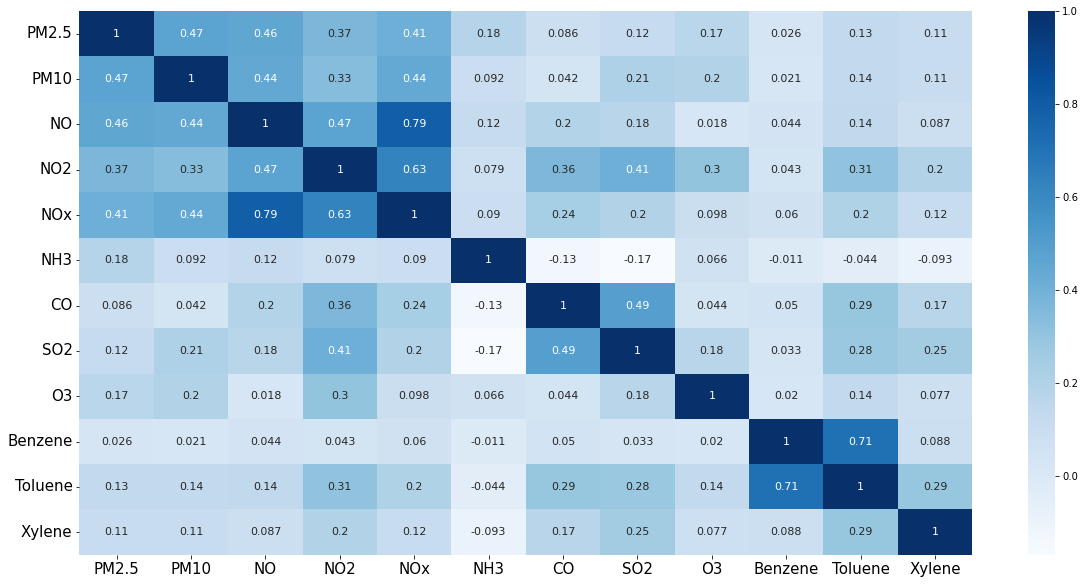

In [ ]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(df_feature.corr(), annot = True, annot_kws = {"size": 11}, cmap = 'Blues')

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

Identifying the variables with a correlation greater than 0.75 and less than -0.75.

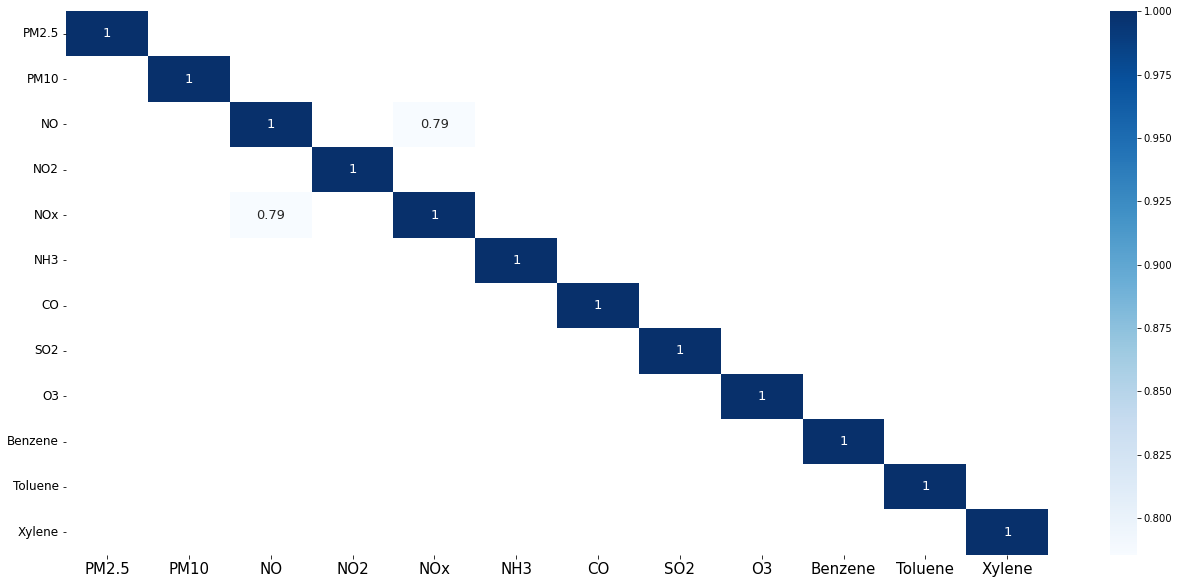

In [ ]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (22,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()) > 0.75], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark shade represent the strong positive correlation.

#### Calculate the VIF for each numeric variable.

In [ ]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_feature.values, i) for i in range(df_feature.shape[1])]

# create a column of variable names
vif["Features"] = df_feature.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,3.469830,NOx
1,2.903118,NO
2,2.796620,Toluene
3,2.308239,Benzene
4,2.260872,NO2
5,1.603121,SO2
6,1.523956,PM10
7,1.505794,PM2.5
8,1.494799,CO
9,1.184990,O3


The output shows that the variable 'NOx' has the highest VIF. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 3. We set the threshold to 3, as we wish to remove the variable for which the remaining variables explain more than 97% of the variation.

In [ ]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'
df_feature_vif = df_feature.copy()

# use for loop to iterate the VIF function 
for ind in range(len(df_feature_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_feature_vif.values, i) for i in range(df_feature_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_feature_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 3]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_feature_vif = df_feature_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor Features
0     1.503669    PM2.5
1     1.497740     PM10
2     1.640125       NO
3     1.824408      NO2
4     1.107742      NH3
5     1.492268       CO
6     1.578357      SO2
7     1.183716       O3
8     2.307330  Benzene
9     2.796587  Toluene
10    1.160194   Xylene


In [ ]:
# display the first 5 observations of full features
df_feature.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-0.472613,0.021674,-0.590771,0.259201,-0.357013,-0.952888,-0.303171,0.002591,-1.148686,-0.086743,2.124439,0.056340
1,-1.004488,-1.191937,-0.274251,-1.174521,-0.525579,-0.121321,-0.343152,-0.715009,-1.439697,0.030337,-0.185744,-0.358051
2,-0.723464,-0.852330,-0.722429,-0.780524,-0.815739,-0.590871,-0.255501,-0.202271,-0.249782,-0.196108,-0.372693,-0.329243
3,-0.150985,-0.057145,0.689285,-0.557902,-0.022879,-0.193296,-0.255501,-0.632947,-0.835039,-0.115594,-0.340507,1.596458
4,-0.795686,-0.894113,-0.611962,-0.634159,-0.534907,-0.634999,-0.263190,-0.447873,-0.884927,-0.184702,-0.364647,-0.358051


In [ ]:
# display the first 5 observations of vif reduced features 
df_feature_vif.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-0.472613,0.021674,-0.590771,0.259201,-0.952888,-0.303171,0.002591,-1.148686,-0.086743,2.124439,0.056340
1,-1.004488,-1.191937,-0.274251,-1.174521,-0.121321,-0.343152,-0.715009,-1.439697,0.030337,-0.185744,-0.358051
2,-0.723464,-0.852330,-0.722429,-0.780524,-0.590871,-0.255501,-0.202271,-0.249782,-0.196108,-0.372693,-0.329243
3,-0.150985,-0.057145,0.689285,-0.557902,-0.193296,-0.255501,-0.632947,-0.835039,-0.115594,-0.340507,1.596458
4,-0.795686,-0.894113,-0.611962,-0.634159,-0.634999,-0.263190,-0.447873,-0.884927,-0.184702,-0.364647,-0.358051


In [ ]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_vif'
X_vif = df_feature_vif.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_vif'
y_vif = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_vif = sm.add_constant(X_vif)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, y_vif, random_state=42, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_vif :', X_train_vif.shape)
print('y_train_vif :', y_train_vif.shape)

# print dimension of test set
print('X_test_vif  :', X_test_vif.shape)
print('y_test_vif  :', y_test_vif.shape)

X_train_vif : (17348, 12)
y_train_vif : (17348,)
X_test_vif  : (7436, 12)
y_test_vif  : (7436,)


In [ ]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_vif_model = sm.OLS(y_train_vif, X_train_vif).fit()

# print the summary output
print(MLR_vif_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     7846.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:37:51   Log-Likelihood:                -9114.6
No. Observations:               17348   AIC:                         1.825e+04
Df Residuals:                   17336   BIC:                         1.835e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.003     -0.353      0.7

In [ ]:
X_train_vif1= X_train_vif.drop("const",axis=1)
X_test_vif1= X_test_vif.drop("const",axis=1)

MLR_vif_sk = LR.fit(X_train_vif1, y_train_vif)
MLR_vif_sk.score(X_train_vif1,y_train_vif) , MLR_vif_sk.score(X_test_vif1,y_test_vif)

(0.8327295660961613, 0.8483587976221688)

In [ ]:
print('RMSE on train set:', get_train_rmse(MLR_vif_sk, X_train_vif1,y_train_vif))
print('RMSE on test set:', get_test_rmse( MLR_vif_sk, X_test_vif1,y_test_vif))

RMSE on train set: 0.4092
RMSE on test set: 0.3889


In [ ]:
update_score_card("MLR_vif_sk",MLR_vif_sk, X_train_vif1,y_train_vif,X_test_vif1,y_test_vif)

<a id="pval"></a>
## 4.6 Model with significant p-values

#### Calculate the p-values to know the insignificant variables

In [ ]:
# calculate p-values for all the independent variables in the MLR_model
# create a dataframe containing p-values 
# pass the column name to the parameter 'columns'
MLR_pvalues = pd.DataFrame(MLR_vif_model.pvalues, columns = ["P-Value"])

# print the dataframe
MLR_pvalues.index

Index(['const', 'PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene'],
      dtype='object')

**Interpretation:** The above table shows the p-value of each variable. Use this dataframe to identify the significant variables.

#### Create a list of insignificant variables.

In [ ]:
# subset the dataframe 'MLR_pvalues' such that the variables will have p-value greater than 0.05
# store the subset of a dataframe to a new dataframe 'insignificant_var' 
insignificant_var = MLR_pvalues[1:][MLR_pvalues[1:]['P-Value'] > 0.05]

# get the variable names with p-value greater than 0.05
insigni_var = insignificant_var.index

# convert the variables to the type 'list' using 'to_list()'
insigni_var = insigni_var.to_list()

# print the list of insignificant variables
insigni_var

['NO', 'NH3', 'Benzene', 'Toluene']

In [ ]:
# drop the insignificant variables in the dataframe 'X_train_signi_var'
# we drop the variable '['NO', 'NH3', 'Benzene', 'Toluene', 'Xylene']', as it seems insignificant by the above model
# 'axis = 1' drops the corresponding column(s)
X_train_signi_var = X_train_vif.copy()
y_train_signi_var = y_train_vif.copy()

X_train_signi_var = X_train_signi_var.drop(insigni_var, axis=1)

# drop the insignificant variables from the dataframe 'X_test_signi_var'
# 'axis = 1' drops the corresponding column(s)
X_test_signi_var = X_test_vif.copy()
y_test_signi_var = y_test_vif.copy()

X_test_signi_var = X_test_signi_var.drop(insigni_var, axis=1)

# building a model on training dataset
# fit() is used to fit the OLS model
MLR_model_with_significant_var = sm.OLS(y_train_signi_var, X_train_signi_var).fit()

# print the summary output
print(MLR_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:37:51   Log-Likelihood:                -9116.8
No. Observations:               17348   AIC:                         1.825e+04
Df Residuals:                   17340   BIC:                         1.831e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.003     -0.338      0.7

In [ ]:
X_train_signi_var1 = X_train_signi_var.drop("const",axis=1)
X_test_signi_var1 = X_test_signi_var.drop("const",axis=1)

MLR_significant_var = LR.fit(X_train_signi_var1, y_train_signi_var)
MLR_significant_var.score(X_train_signi_var1, y_train_signi_var) , MLR_significant_var.score(X_test_signi_var1, y_test_signi_var)

(0.8326866308162801, 0.8485057023101128)

In [ ]:
print('RMSE on train set:', get_train_rmse(MLR_significant_var, X_train_signi_var1, y_train_signi_var))
print('RMSE on test set:', get_test_rmse( MLR_significant_var, X_test_signi_var1, y_test_signi_var))

RMSE on train set: 0.4093
RMSE on test set: 0.3887


**Interpretation:** Although p-value for ['NO', 'NH3', 'Benzene', 'Toluene'] is high, dropping those columns did not have much impact on the model.

So mostly we should not drop them because they contribute in AQI. Dropping them would mean they have no impact on AQI, which is not correct.

In [ ]:
update_score_card("MLR_significant_var",MLR_significant_var, X_train_signi_var1, y_train_signi_var,X_test_signi_var1, y_test_signi_var)

<a id="step"></a>
# 5. Stepwise Regression

<a id="for"></a>
## 5.1 Forward Selection

This method considers the null model (model with no predictors) in the first step. In the next steps start adding one variable at each step until we run out of the independent variables or the stopping rule is achieved. 

The variable is added based on its correlation with the target variable. Such a variable has the least p-value in the model.




In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train_full, y_train_full)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2022-11-14 15:37:52] Features: 1/12 -- score: 0.4573076952489735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2022-11-14 15:37:53] Features: 2/12 -- score: 0.7953077589017636[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2022-11-14 15:37:53] Features: 3/12 -- score: 0.8149138220008357[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
# print the selected feature names when k_features = (5, 15)
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Xylene')

R-Squared:  0.8297376361141768


<a id="back"></a>
## 5.2 Backward Elimination

This method considers the full model (model with all the predictors) in the first step. In the next steps start removing one variable at each step until we run out of the independent variables or the stopping rule is achieved.

The least significant variable (with the highest p-value) is removed at each step.

In [ ]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. 'best' means that a best possible subset will be selected 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train_full, y_train_full)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s finished

[2022-11-14 15:37:56] Features: 11/1 -- score: 0.8297101736014415[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.6s finished

[2022-11-14 15:37:57] Features: 10/1 -- score: 0.8297288020044762[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished

[2022-11-14 15:37:57] Features: 9/1 -- score: 0.8297376361141768[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
# print the selected feature names when k_features = 'best'
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Xylene')

R-Squared:  0.8297376361141768


<a id="rfe"></a>
# 6. Recursive Feature Elimination (RFE)

It is the process that returns the significant features in the dataset by recursively removing the less significant feature subsets.

We will try to find out what would be the significant number of features for RFE.

In [ ]:
r2_scores_train = []
r2_scores_test = []
rmse_values_train = []
rmse_values_test = []

# loop to work with different number of features 
for i in range(4,31):
    rfe_select = RFE(estimator=LinearRegression(),n_features_to_select=i)
    rfe_select.fit(X_train_full,y_train_full)
    feature_ranks = pd.Series(rfe_select.ranking_, index = X_train_full.columns)
    selected_features = feature_ranks[feature_ranks==1].index
    
    # run the model
    test_model = linreg.fit(X_train_full[selected_features], y_train_full)
    
    #predict
    y_pred_train_rfe = test_model.predict(X_train_full[selected_features])
    y_pred_test_rfe = test_model.predict(X_test_full[selected_features]) 
    
    # train
    r2_scores_train.append(test_model.score(X_train_full[selected_features], y_train_full))
    rmse_values_train.append(np.sqrt(mean_squared_error(y_train_full,y_pred_train_rfe)))
    
    # test
    r2_scores_test.append(test_model.score(X_test_full[selected_features], y_test_full))
    rmse_values_test.append(np.sqrt(mean_squared_error(y_test_full,y_pred_test_rfe)))

Draw the line plot for train scores with different number of features.

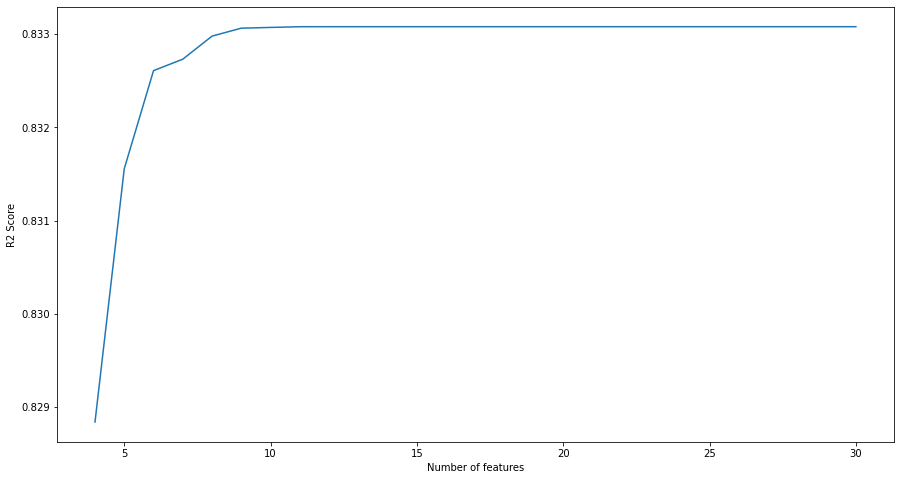

In [ ]:
sns.lineplot(x = range(4,31), y = r2_scores_train)

plt.ylabel('R2 Score')
plt.xlabel('Number of features')

plt.show()

Draw the line plot for test scores with different number of features.

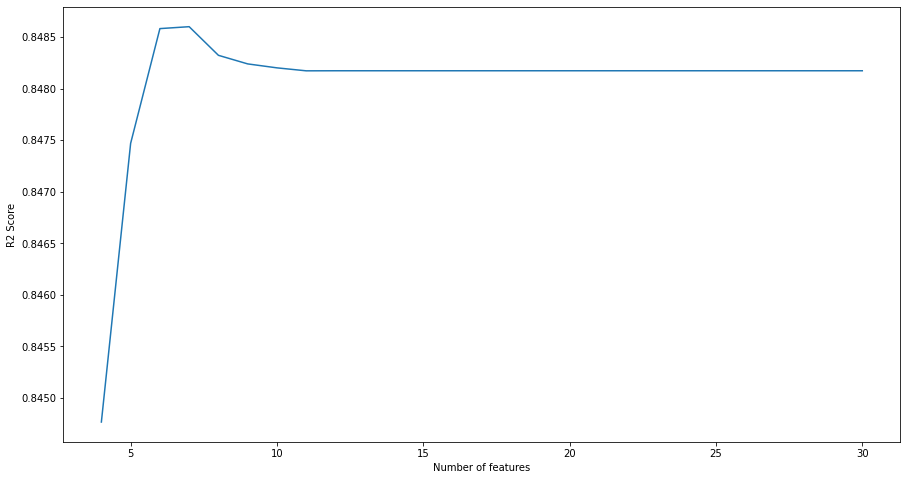

In [ ]:
sns.lineplot(x = range(4,31), y = r2_scores_test)

plt.ylabel('R2 Score')
plt.xlabel('Number of features')

plt.show()

Draw the line plot for rmse values of training dataset with different number of features.

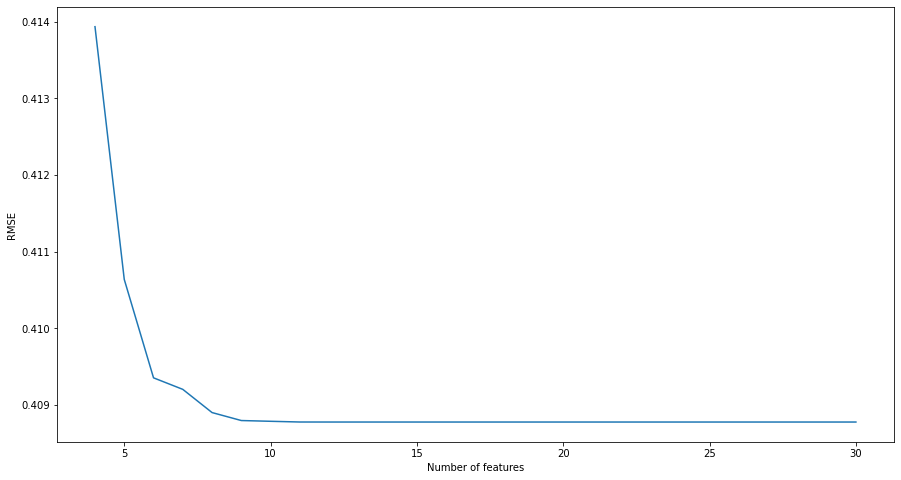

In [ ]:
sns.lineplot(x = range(4,31), y = rmse_values_train)

plt.ylabel('RMSE')
plt.xlabel('Number of features')

plt.show()

Draw the line plot for rmse values of test dataset with different number of features.

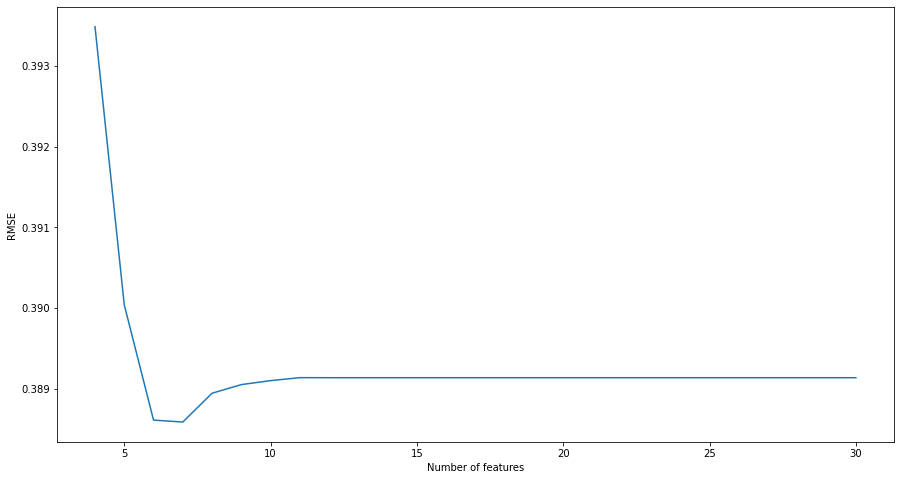

In [ ]:
sns.lineplot(x = range(4,31), y = rmse_values_test)

plt.ylabel('RMSE')
plt.xlabel('Number of features')

plt.show()

From the above plots we see 7 features would be good to consider for RFE.
Making a model with 7 features.

In [ ]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select', if not passed then half the features are selected
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select=7)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train_full, y_train_full)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_full.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'SO2', 'O3'], dtype='object')


Lets create a linear regression model using the significant variables obtained after RFE.

In [ ]:
# store the X_train with significant variables in new_X_train and new_X_test
new_X_train = X_train_full[signi_feat_rfe]
new_X_test = X_test_full[signi_feat_rfe]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
MLR_rfe_model_sk = linreg.fit(new_X_train, y_train_full)

# check the score
linreg.score(new_X_train, y_train_full)

0.8327293430532496

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(MLR_rfe_model_sk, new_X_train, y_train_full))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(MLR_rfe_model_sk, new_X_test, y_test_full))

RMSE on train set: 0.4092
RMSE on test set: 0.3886


In [ ]:
update_score_card("MLR_rfe_model_sk",MLR_rfe_model_sk, new_X_train, y_train_full, new_X_test, y_test_full)

<a id="SGD"></a>
# 7. Stochastic Gradient Descent (SGD)

The gradient descent method considers all the data points to calculate the values of the parameters at each step. For a very large dataset, this method becomes computationally expensive. To avoid this problem, we use Stochastic Gradient Descent (SGD) which considers a single data point (sample) to perform each iteration. Each sample is randomly selected for performing the iteration.

####  Build MLR model using SGD method.

In [ ]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor()

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train_full, y_train_full)

# check the train/test score
linreg_with_SGD.score(X_train_full, y_train_full) , linreg_with_SGD.score(X_test_full, y_test_full)

(0.8258209657360491, 0.8371266017756932)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD, X_train_full, y_train_full))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD, X_test_full, y_test_full))

RMSE on train set: 0.4176
RMSE on test set: 0.403


In [ ]:
update_score_card("linreg_with_SGD",linreg_with_SGD, X_train_full, y_train_full, X_test_full, y_test_full)

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `linreg_with_SGD`

In [ ]:
# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train_full, y_train_full)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train_full, y_train_full)

0.8330774936854883

In [ ]:
update_score_card("MLR_model",MLR_model, X_train_full, y_train_full, X_test_full, y_test_full)

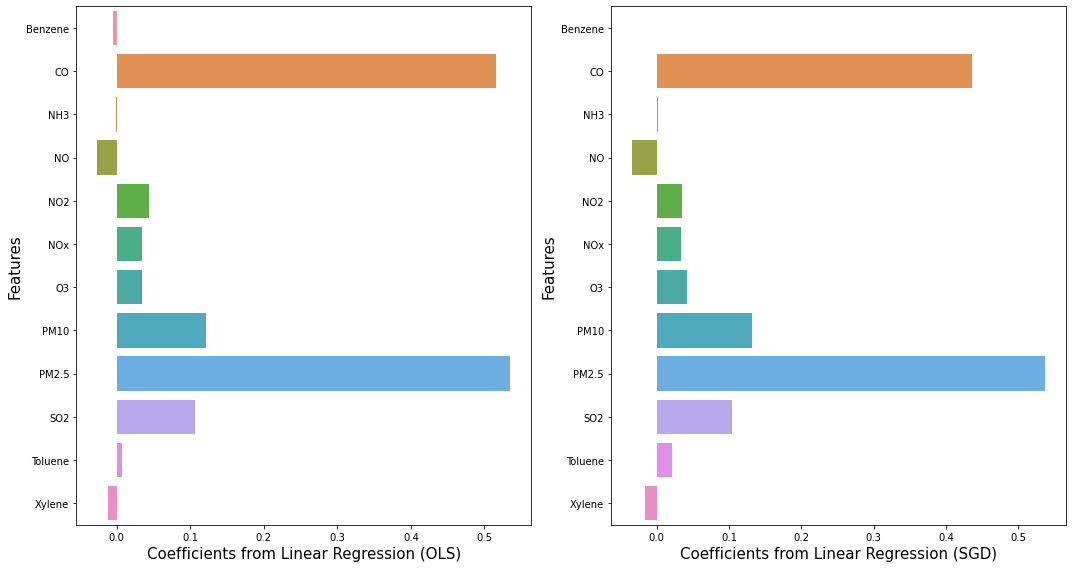

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)', X_train_full)

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)', X_train_full)

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

<a id="regu"></a>
# 8. Regularization

One way to deal with the overfitting problem is by adding the `Regularization` to the model. It is observed that inflation of the coefficients cause overfitting. To prevent overfitting, it is important to regulate the coefficients by penalizing possible coefficient inflations. Regularization imposes penalties on parameters if they inflate to large values to prevent them from being weighted too heavily. In this section, we will learn about the three regularization techniques:

1. Ridge Regression
2. Lasso Regression
3. Elastic Net Regression

<a id="ridge"></a>
## 8.1 Ridge Regression

Most of the times our data can show multicollinearity in the variables. To analyze such data we can use `Ridge Regression`. It uses the L2 norm for regularization. 

#### Build regression model using Ridge Regression for alpha = 1.

In [ ]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train_full, y_train_full)

# score for train set
print('Score of the rigde model on training set:', ridge.score(X_train_full, y_train_full))

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(ridge, X_train_full, y_train_full))

Score of the rigde model on training set: 0.8330774910843589
RMSE on train set: 0.4088


In [ ]:
# score for test set
print('Score of the rigde model on test set', ridge.score(X_test_full, y_test_full))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge, X_test_full, y_test_full))

Score of the rigde model on test set 0.8481722865159047
RMSE on test set: 0.3891


**Interpretation:** After applying the ridge regression with alpha equal to one, we get 0.3891 as the RMSE value.

In [ ]:
update_score_card("ridge",ridge, X_train_full, y_train_full, X_test_full, y_test_full)

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `ridge_model`

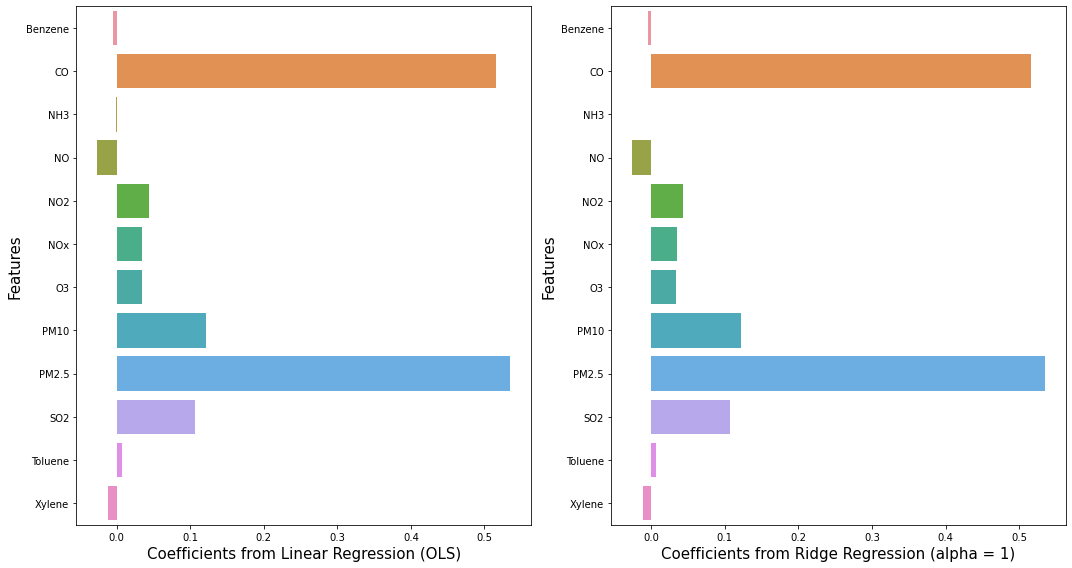

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)', X_train_full)

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 1)', X_train_full)

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:** The coefficients obtained from ridge regression have smaller values as compared to the coefficients obtained from linear regression using OLS.

<a id="lasso"></a>
## 8.2 Lasso Regression

Lasso regression shrinks the less important variable's coefficient to zero which makes this technique more useful when we are dealing with large number of variables. It is a type of regularization technique that uses L1 norm for regularization. 

In [ ]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train_full, y_train_full)

# score for train set
print('Score of the lasso model on training set:', lasso.score(X_train_full, y_train_full))

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(lasso, X_train_full, y_train_full))

Score of the lasso model on training set: 0.8324370463751745
RMSE on train set: 0.4096


In [ ]:
# score for test set
print('Score of the lasso model on test set', lasso.score(X_test_full, y_test_full))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso, X_test_full, y_test_full))

Score of the lasso model on test set 0.8479104933045822
RMSE on test set: 0.3895


In [ ]:
update_score_card("lasso",lasso, X_train_full, y_train_full, X_test_full, y_test_full)

**Interpretation:** After applying the lasso regression with alpha equal to 0.01, the RMSE value is 0.3895.

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `lasso_model`

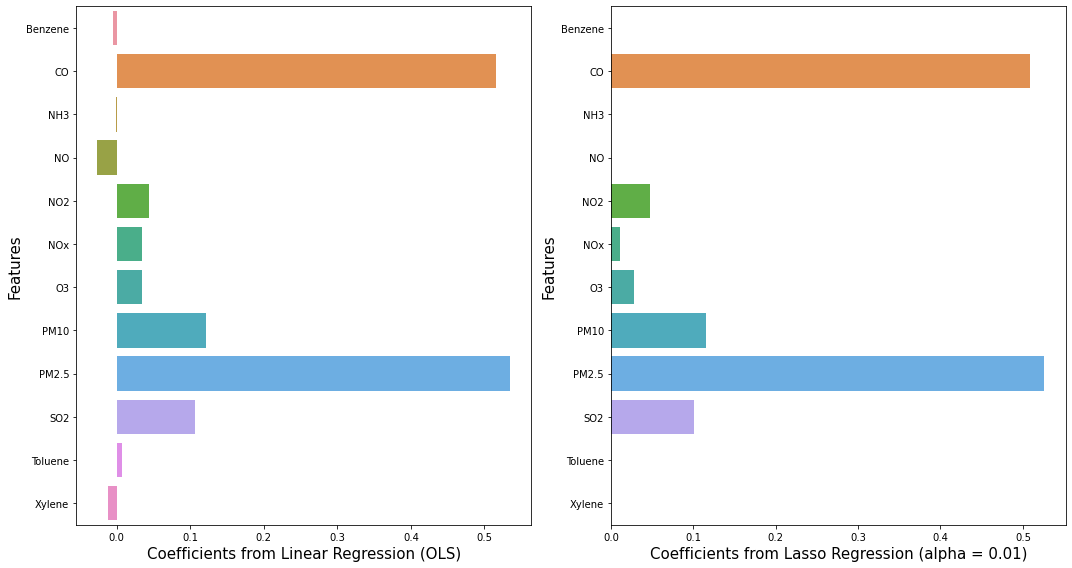

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)', X_train_full)

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)', X_train_full)

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:** The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

Let us print the list of variables with zero coefficient.

In [ ]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X_train_full.columns, 'Coefficient': lasso.coef_})

# print the variables having the coefficient value equal to zero
# 'to_list()' converts the output to the list type
print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['NO', 'NH3', 'Benzene', 'Toluene', 'Xylene']

<a id="elastic"></a>
## 8.3 Elastic Net Regression

This technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.

In [ ]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train_full, y_train_full)

# score for train set
print('Score of the ElasticNet model on training set:', enet.score(X_train_full, y_train_full))

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(enet, X_train_full, y_train_full))

Score of the ElasticNet model on training set: 0.827431127695652
RMSE on train set: 0.4156


In [ ]:
# score for test set
print('Score of the ElasticNet model on test set', enet.score(X_test_full, y_test_full))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet, X_test_full, y_test_full))

Score of the ElasticNet model on test set 0.8404756624518023
RMSE on test set: 0.3989


**Interpretation:** With the elastic-net regression, we get 0.3989 as the RMSE value.

In [ ]:
update_score_card("enet",enet, X_train_full, y_train_full, X_test_full, y_test_full)

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `Elastic Net regression`

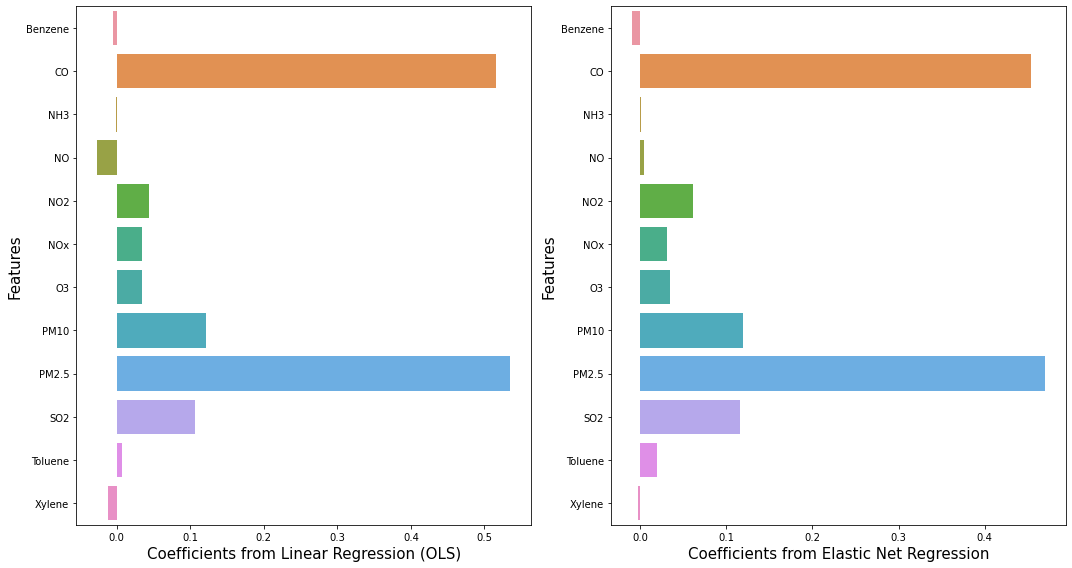

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)', X_train_full)

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression', X_train_full)

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

<a id="GScv"></a>
# 9. GridSearchCV

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. Following are some of the parameters that GridSearchCV takes:

1. estimator: pass the machine learning algorithm model
2. param_grid: takes a dictionary having parameter names as keys and list of parameters as values
3. cv: number of folds for k-fold cross validation

#### Find optimal value of alpha for `Ridge Regression`

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[20, 50, 80, 100, 110, 120]}]
 
# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train_full and y_train_full using fit()
ridge_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_)

Best parameters for Ridge Regression:  {'alpha': 100}


In [ ]:
# score for train set
print('Score of the ridge_grid model on training set:', ridge_grid.score(X_train_full, y_train_full))

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(ridge_grid, X_train_full, y_train_full))

Score of the ridge_grid model on training set: 0.8330520411412479
RMSE on train set: 0.4088


In [ ]:
# score for test set
print('Score of the ridge_grid model on test set', ridge_grid.score(X_test_full, y_test_full))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge_grid, X_test_full, y_test_full))

Score of the ridge_grid model on test set 0.8480292945986232
RMSE on test set: 0.3893


**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is 0.3893.

In [ ]:
update_score_card("ridge_grid",ridge_grid, X_train_full, y_train_full, X_test_full, y_test_full)

#### Find optimal value of alpha & l1_ratio for `Elastic Net Regression`

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
                      'l1_ratio':[0.01, 0.1, 1, 2, 5]}]

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_)

Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 1}


In [ ]:
# score for train set
print('Score of the enet_grid model on training set:', enet_grid.score(X_train_full, y_train_full))

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(enet_grid, X_train_full, y_train_full))

Score of the enet_grid model on training set: 0.8330552265259593
RMSE on train set: 0.4088


In [ ]:
# score for test set
print('Score of the enet_grid model on test set', enet_grid.score(X_test_full, y_test_full))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet_grid, X_test_full, y_test_full))

Score of the enet_grid model on test set 0.8482933397855206
RMSE on test set: 0.389


**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is 0.389. 

In [ ]:
update_score_card("enet_grid",enet_grid, X_train_full, y_train_full, X_test_full, y_test_full)

<a id="DTR"></a>
# Decision Tree Regressor Model

In [ ]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_dt'
X_dt = df_feature.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_dt'
y_dt = df_target.copy()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, random_state=42, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_dt :', X_train_dt.shape)
print('y_train_dt :', y_train_dt.shape)

# print dimension of test set
print('X_test_dt  :', X_test_dt.shape)
print('y_test_dt  :', y_test_dt.shape)

X_train_dt : (17348, 12)
y_train_dt : (17348,)
X_test_dt  : (7436, 12)
y_test_dt  : (7436,)


In [ ]:
DTR = DecisionTreeRegressor(random_state=42, max_depth=7)
DTR_model = DTR.fit(X_train_dt,y_train_dt)
pred = DTR_model.predict(X_train_dt)
DTR_model.score( X_train_dt,y_train_dt) , DTR_model.score( X_test_dt,y_test_dt)

(0.9256939295808614, 0.8522188336731138)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(DTR_model, X_train_dt,y_train_dt))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(DTR_model, X_test_dt,y_test_dt))

RMSE on train set: 0.2727
RMSE on test set: 0.3839


In [ ]:
update_score_card("DTR_model",DTR_model, X_train_dt,y_train_dt, X_test_dt,y_test_dt)

In [ ]:
# storing significant variables in X_train_sig_dt and X_test_sig_dt
X_train_sig_dt = X_train_signi_var.iloc[:,1:]
X_test_sig_dt = X_test_signi_var.iloc[:,1:]

# storing traget in y_train_sig_dt and y_test_sig_dt
y_train_sig_dt = y_train_signi_var
y_test_sig_dt = y_test_signi_var

In [ ]:
DTR_model_sig = DTR.fit(X_train_sig_dt,y_train_signi_var)
DTR_model_sig.score( X_train_sig_dt,y_train_sig_dt) , DTR_model_sig.score( X_test_sig_dt,y_test_sig_dt)

(0.9244148205702558, 0.8652704565360002)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(DTR_model_sig,X_train_sig_dt,y_train_sig_dt))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(DTR_model_sig , X_test_sig_dt,y_test_sig_dt))

RMSE on train set: 0.2751
RMSE on test set: 0.3666


In [ ]:
update_score_card("DTR_model_sig",DTR_model_sig,X_train_sig_dt,y_train_sig_dt , X_test_sig_dt,y_test_sig_dt)

In [ ]:
tuned_paramaters = [{'criterion': ["squared_error", "friedman_mse", "absolute_error","poisson"], 
                     'max_depth': [5,10],
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'min_samples_split': [2,5,8],
                     'min_samples_leaf': [1,5,9],
                     'max_leaf_nodes': [5,8]}]

tree_grid = GridSearchCV(estimator = DTR, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train_dt,y_train_dt)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [ ]:
# instantiate the 'DecisionTreeRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeRegressor(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 42)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train_dt,y_train_dt)
dt_model.score( X_train_dt,y_train_dt) , dt_model.score(X_test_dt,y_test_dt)

(0.610181196435641, 0.5763981957201965)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(dt_model, X_train_dt,y_train_dt))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(dt_model, X_test_dt,y_test_dt))

RMSE on train set: 0.6247
RMSE on test set: 0.65


In [ ]:
update_score_card("dt_model",dt_model, X_train_dt,y_train_dt , X_test_dt,y_test_dt)

In [ ]:
# initiate Decision Tree regression model to use in feature selection
DTR = DecisionTreeRegressor(random_state=42)

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select', if not passed then half the features are selected
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=DTR, n_features_to_select=7)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train_dt, y_train_dt)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_dt.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

# store the X_train with significant variables in new_X_train and new_X_test
new_X_train_dt = X_train_full[signi_feat_rfe]
new_X_test_dt = X_test_full[signi_feat_rfe]
# store the target with new_y_traint_dt and new_y_test_dt
new_y_train_dt = y_train_dt
new_y_test_dt = y_test_dt

Index(['PM2.5', 'PM10', 'NO', 'CO', 'SO2', 'O3', 'Toluene'], dtype='object')


In [ ]:
dt_model_rfe = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 7,
                                  random_state = 42)

# use fit() to fit the model on the train set
dt_model_rfe = dt_model_rfe.fit(new_X_train_dt,new_y_train_dt)
dt_model_rfe.score( new_X_train_dt,new_y_train_dt) , dt_model_rfe.score(new_X_test_dt, new_y_test_dt)

(0.9234655013017828, 0.8639511915122741)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(dt_model_rfe, new_X_train_dt, new_y_train_dt))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(dt_model_rfe, new_X_test_dt, new_y_test_dt))

RMSE on train set: 0.2768
RMSE on test set: 0.3684


In [ ]:
update_score_card("dt_model_rfe", dt_model_rfe, new_X_train_dt, new_y_train_dt, new_X_test_dt, new_y_test_dt)

<a id="RFR"></a>
# Random Forest Regressor Model

In [ ]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_rf'
X_rf = df_feature.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_rf'
y_rf = df_target.copy()

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, random_state=42, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_rf :', X_train_rf.shape)
print('y_train_rf :', y_train_rf.shape)

# print dimension of test set
print('X_test_rf  :', X_test_rf.shape)
print('y_test_rf  :', y_test_rf.shape)

X_train_rf : (17348, 12)
y_train_rf : (17348,)
X_test_rf  : (7436, 12)
y_test_rf  : (7436,)


In [ ]:
RFR = RandomForestRegressor(random_state = 42)
RFR_model = RFR.fit(X_train_rf,y_train_rf)

In [ ]:
RFR_model.score(X_train_rf,y_train_rf) , RFR_model.score(X_test_rf,y_test_rf)

(0.9861128713221043, 0.9007705493598488)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(RFR_model, X_train_rf,y_train_rf))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(RFR_model, X_test_rf,y_test_rf))

RMSE on train set: 0.1179
RMSE on test set: 0.3146


In [ ]:
update_score_card('RFR_model',RFR_model, X_train_rf,y_train_rf, X_test_rf,y_test_rf)

In [ ]:
# storing significant variables in X_train_sig_rf and X_test_sig_rf
X_train_sig_rf = X_train_signi_var.iloc[:,1:]
X_test_sig_rf = X_test_signi_var.iloc[:,1:]

# storing traget in y_train_sig_rf and y_test_sig_rf
y_train_sig_rf = y_train_signi_var
y_test_sig_rf = y_test_signi_var

In [ ]:
RFR_model_sig = RFR.fit(X_train_sig_rf,y_train_sig_rf)
pred3 = RFR_model_sig.predict(X_train_sig_rf)
RFR_model_sig.score( X_train_sig_rf ,y_train_sig_rf) , RFR_model_sig.score(X_test_sig_rf,y_test_sig_rf)

(0.9858163582724345, 0.8969346517141743)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(RFR_model_sig, X_train_sig_rf, y_train_sig_rf))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(RFR_model_sig, X_test_sig_rf, y_test_sig_rf))

RMSE on train set: 0.1192
RMSE on test set: 0.3206


In [ ]:
update_score_card("RFR_model_sig",RFR_model_sig, X_train_sig_rf, y_train_sig_rf, X_test_sig_rf, y_test_sig_rf)

In [ ]:
# initiate Decision Tree regression model to use in feature selection
RFR = RandomForestRegressor(random_state=42)

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select', if not passed then half the features are selected
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=RFR, n_features_to_select=11)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train_rf, y_train_rf)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rf.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

# store the X_train with significant variables in new_X_train and new_X_test
new_X_train_rf = X_train_full[signi_feat_rfe]
new_X_test_rf = X_test_full[signi_feat_rfe]
# store the target with new_y_traint_rf and new_y_test_rf
new_y_train_rf = y_train_rf
new_y_test_rf = y_test_rf

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene'],
      dtype='object')


In [ ]:
RFR_model_rfe = RFR.fit(new_X_train_rf,new_y_train_rf)
RFR_model_rfe.score(new_X_train_rf , new_y_train_rf) , RFR_model_rfe.score(new_X_test_rf,new_y_test_rf)

(0.9860732365857641, 0.9004423064315489)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(RFR_model_rfe, new_X_train_rf , new_y_train_rf))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(RFR_model_rfe, new_X_test_rf,new_y_test_rf))

RMSE on train set: 0.1181
RMSE on test set: 0.3151


In [ ]:
update_score_card("RFR_model_rfe",RFR_model_rfe, new_X_train_rf , new_y_train_rf, new_X_test_rf,new_y_test_rf)

In [ ]:
tuned_paramaters = [{'criterion': ["squared_error", "friedman_mse"], 
                     'max_depth': range(5,8),
                     'max_features': ["sqrt", "log2"], # it can be either square root of the feature or log of number of features
                     'n_estimators' : range(138,148,2)}]

tree_grid = GridSearchCV(estimator = RFR, 
                         param_grid = tuned_paramaters)

# fit the model on X_train and y_train using fit()
RFR_grid_model = tree_grid.fit(X_train_dt,y_train_dt)

# get the best parameters
print('Best parameters for decision tree classifier: ', RFR_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 146} 



In [ ]:
RFR_grid_model.score(X_train_rf,y_train_rf) , RFR_grid_model.score(X_test_rf,y_test_rf)

(0.9178112976729316, 0.8890250820973752)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(RFR_grid_model, X_train_rf,y_train_rf))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(RFR_grid_model, X_test_rf,y_test_rf))

RMSE on train set: 0.2868
RMSE on test set: 0.3327


In [ ]:
RFR_grid = RandomForestRegressor(criterion='friedman_mse', max_depth=7, max_features='sqrt', n_estimators=146)
RFR_grid = RFR_grid.fit(X_train_rf, y_train_rf)
RFR_grid.score(X_train_rf, y_train_rf) , RFR_grid.score(X_test_rf, y_test_rf)

(0.9151630765684426, 0.8878093191608822)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(RFR_grid,X_train_rf,y_train_rf))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(RFR_grid,X_test_rf,y_test_rf))

RMSE on train set: 0.2914
RMSE on test set: 0.3345


In [ ]:
update_score_card('RFR_grid',RFR_grid, X_train_rf,y_train_rf, X_test_rf,y_test_rf)

<a id="ada"></a>
# AdaBoost Regressor Model

In [ ]:
adaboost_regr = AdaBoostRegressor(n_estimators = 10, random_state = 42)
adaboost_model = adaboost_regr.fit(X_train_full,y_train_full)
adaboost_model.score(X_train_full,y_train_full), adaboost_model.score(X_test_full,y_test_full)

(0.8112531478285248, 0.7933047163763628)

In [ ]:
print('RMSE on train set:', get_train_rmse(adaboost_model, X_train_full, y_train_full))
print('RMSE on test set:', get_test_rmse(adaboost_model, X_test_full, y_test_full))

RMSE on train set: 0.4347
RMSE on test set: 0.454


In [ ]:
update_score_card("adaboost_model",adaboost_model, X_train_full, y_train_full, X_test_full, y_test_full)

In [ ]:
adaboost_regr = AdaBoostRegressor(random_state = 42)

tuned_paramaters = [{"n_estimators": range(7,15), "loss": ["linear", "square", "exponential"]}]
 
adaboost_grid = GridSearchCV(estimator = adaboost_regr, 
                          param_grid = tuned_paramaters, 
                          cv = 5)

# fit the model on X_train_full and y_train_full using fit()
adaboost_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for Ridge Regression: ', adaboost_grid.best_params_)

Best parameters for Ridge Regression:  {'loss': 'exponential', 'n_estimators': 9}


In [ ]:
adaboost_grid.score(X_train_full,y_train_full), adaboost_model.score(X_test_full,y_test_full)

(0.8122905162915178, 0.7933047163763628)

In [ ]:
print('RMSE on train set:', get_train_rmse(adaboost_grid, X_train_full, y_train_full))
print('RMSE on test set:', get_test_rmse(adaboost_grid, X_test_full, y_test_full))

RMSE on train set: 0.4335
RMSE on test set: 0.4432


In [ ]:
update_score_card("adaboost_grid",adaboost_grid, X_train_full, y_train_full, X_test_full, y_test_full)

<a id="compare"></a>
# Compare Model Performace

In [ ]:
score_card

,Algorithm_name,Train_score,Adj_Train_score,Test_score,Adj_Test_score,Train_RMSE,Test_RMSE
0,MLR_full_model_sk,0.833077,0.832962,0.848173,0.847928,0.4088,0.3891
1,MLR_vif_sk,0.832730,0.832623,0.848359,0.848134,0.4092,0.3889
2,MLR_significant_var,0.832687,0.832619,0.848506,0.848363,0.4093,0.3887
3,MLR_rfe_model_sk,0.832729,0.832662,0.848601,0.848458,0.4092,0.3886
4,linreg_with_SGD,0.825821,0.825700,0.837127,0.836863,0.4176,0.4030
5,MLR_model,0.833077,0.832962,0.848173,0.847928,0.4088,0.3891
6,ridge,0.833077,0.832962,0.848172,0.847927,0.4088,0.3891
7,lasso,0.832437,0.832321,0.847910,0.847665,0.4096,0.3895
8,enet,0.827431,0.827312,0.840476,0.840218,0.4156,0.3989
9,ridge_grid,0.833052,0.832936,0.848029,0.847784,0.4088,0.3893


By comapring we see **RFR_grid** to be the most suitable model, as it is not much overfitted or underfitted.

Also RMSE values on test and train are less with close values.

We select our final model to be as **"Tuned Random Forest Regressor"**.

<a id="pickle"></a>
# Best Model deployed with Pickle

In [ ]:
#Save the model with Pickle
pickle.dump(RFR_grid, open('model.pkl', 'wb'))

In [ ]:
#Load the model from Pickle
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test_rf)

array([-0.63385872, -0.28034997,  0.65016389, ..., -0.61451111,
       -0.0676378 , -0.6703737 ])

In [ ]:
pickled_model.score(X_train_rf, y_train_rf) , pickled_model.score(X_test_rf, y_test_rf)

(0.9151630765684426, 0.8878093191608822)

In [ ]:
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(pickled_model,X_train_rf,y_train_rf))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(pickled_model,X_test_rf,y_test_rf))

RMSE on train set: 0.2914
RMSE on test set: 0.3345


Due to the time complexity involved in training large models, saving is becoming a crucial part of the data-science realm. The process works on the concept of serialization(saving of data into its component form) and deserialization(restoring of data from the serialized chunks).